In [1]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#Read data from csv
rawdata = pd.read_csv('telecom_churn_data.csv', sep=',', encoding='ISO-8859-1')
rawdata.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [2]:
#Get columns in the dataframe
rawdata.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

The last four columns started with month names - jun. jul, aug, sep. Since the nomenclature for other columns are given month numbers instead of names lets rename these columns according to their month number

In [3]:
#Rename Columns
rawdata.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [4]:
#Lets get the distribution of numeric data all the columns. 
rawdata.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon      vbc_3g_8      vbc_3g_7  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

           vbc_3g_6      vbc_3g_9  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [5]:
#Get the null % of all the columns
print('\n Null % \n',round(100*(rawdata.isnull().sum()/len(rawdata.index)), 2))


 Null % 
 mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85

Lets look at the features that we need to filter high value customers. THere areno null values in total_rech_amt columns. But there are null values in av_rech_amt_data and total_rech_data columns. Lets look at them

In [6]:
rawdata[['av_rech_amt_data_6','av_rech_amt_data_7']].head(10)

av_rech_amt_data_6  av_rech_amt_data_7
0               252.0               252.0
1                 NaN               154.0
2                 NaN                 NaN
3                 NaN                 NaN
4                56.0                 NaN
5                 NaN                 NaN
6                 NaN                 NaN
7                 NaN                 NaN
8                 NaN               177.0
9                 NaN               154.0

In [7]:
rawdata[['total_rech_data_6','total_rech_data_7']].head(10)

total_rech_data_6  total_rech_data_7
0                1.0                1.0
1                NaN                1.0
2                NaN                NaN
3                NaN                NaN
4                1.0                NaN
5                NaN                NaN
6                NaN                NaN
7                NaN                NaN
8                NaN                2.0
9                NaN                1.0

av_rech_amt_data indicates average recharge amount of data while total_rech_data represents recharge done or not done. They have same percentage of null values, lets impute them with 0's

In [8]:
#Fill missing values to filter high value customers
rawdata[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=rawdata[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

Lets filter the high value customers from the original set who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [9]:
#Get the top 30% customers based on the sum of recharges in month 6 and 7
high_value_cust=rawdata[rawdata[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)> rawdata[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [10]:
#Unnderstand the no of datapoints, column and column types
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(12)
memory usage: 51.9+ MB


In [11]:
#Get the string columns in the data frame
str_cols = high_value_cust.select_dtypes(['object'])
#Strip the leading and trailing whitespaces
high_value_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())

In [12]:
#Convert all the string columns to upper case
high_value_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())

In [13]:
#Get no of unique mobile numbers, this is an id column
len(high_value_cust['mobile_number'].unique())

29949

In [14]:
#set the option to display maximum of 250 rows
pd.set_option("display.max_rows",250)

In [15]:
#Get null% of all columns
round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.52
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc_og_t2t_mou

THere is an interesting pattern here.
All the null columns related to data for the months of 6,7,8,9 follow the below pattern
Month 6 - 50.33%
Month 7 -49.47%
Month 8 - 51.77%
Month 9 -53.49%
And this is repeated for all the data columns of same months
Similarly for all the call columns with null values the following pattern is repeated
Month 6 - 0.20%
Month 7 - 0.32%
Month 8 - 1.93%
Month 9 - 2.76%

The high percentage of null values in data columns and low percentage of null data in call columns indicate those customers use the mobile service only for the calls 

Since the pattern is repeated we can assume that the null values represent customers not using that partical service so we can impute the missing with 0's

But if the number of datapoints are less and if they are not diminishing the minaroty class values we can simply drop them

In [16]:
#Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' should be 0
high_value_cust['churn']=high_value_cust[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [17]:
#Get only the data where the customers churned
churned_total = high_value_cust[high_value_cust['churn']==1]

In [18]:
#No of churned datapoints
len(churned_total)

2451

In [19]:
#No of non churned customers
len(high_value_cust[high_value_cust['churn']==0])

27498

Only 2451 data points are present for churned customers, so dropping null rows would significantly affect the minority class

In [20]:
#Get the null % of columns where the customers churned
print('\n Null % \n',round(100*(churned_total.isnull().sum()/len(churned_total.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               3.75
std_og_t2o_mou               3.75
loc_ic_t2o_mou               3.75
last_date_of_month_6         0.00
last_date_of_month_7         1.14
last_date_of_month_8         6.32
last_date_of_month_9        14.48
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  6.16
onnet_mou_7                  8.04
onnet_mou_8                 30.52
onnet_mou_9                 64.46
offnet_mou_6                 6.16
offnet_mou_7                 8.04
offnet_mou_8                30.52
offnet_mou_9                64.46
roam_ic_mou_6                6.16
roam_ic_mou_7                8.04
roam_ic_mou_8               30.52
roam_ic_mou_9               64.46
roam_og_mou_6                6.16
roam_og_mou_7                8.04
roam_og_mou_8               30.52
roam_og_mou_9               64.46
loc

The data columns are having high percentage of null values for churned customers wheareas call columns are having low percentage of null values. It could mean most customers are using the mobile service for calls rather than data. Since majority of the columns are having null values we cannot simply drop them. We cant drop the rows as this would further diminish minority class. Before imputingthe values lets look at all the columns having null values

In [21]:
#Get the dat of all the rows with null values in more than 40 columns
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40]


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
67        7000800341        109             0.0             0.0   
77        7001328263        109             0.0             0.0   
111       7001300706        109             0.0             0.0   
188       7000340381        109             0.0             0.0   
320       7000959346        109             0.0             0.0   
358       7002255278        109             0.0             0.0   
364       7002168045        109             0.0             0.0   
478       7000104470        109             0.0             0.0   
527       7000142585        109             0.0             0.0   
539       7000670087        109             0.0             0.0   
578       7000248548        109             0.0             0.0   
679       7000066601        109             0.0             0.0   
687       7001662284        109             NaN             NaN   
690       7000185697        109             0.0             0.0   
723       7000684775        109             0.0             0.0   
788       7000636808        109             0.0             0.0   
845       7000945323        109             0.0             0.0   
895       7000436570        109             0.0             0.0   
933       7000006367        109             0.0             0.0   
1022      7002323072        109             0.0             0.0   
1138      7000069975        109             0.0             0.0   
1187      7000486275        109             0.0             0.0   
1255      7002100573        109             0.0             0.0   
1267      7001964545        109             0.0             0.0   
1420      7001642174        109             0.0             0.0   
1489      7002056402        109             0.0             0.0   
1496      7000734827        109             0.0             0.0   
1524      7001790424        109             0.0             0.0   
1555      7002024450        109             0.0             0.0   
1585      7001125494        109             0.0             0.0   
1768      7000126448        109             0.0             0.0   
1802      7000516213        109             0.0             0.0   
1824      7002079634        109             0.0             0.0   
1952      7001545189        109             0.0             0.0   
2035      7000187811        109             0.0             0.0   
2185      7000237332        109             NaN             NaN   
2218      7001005804        109             0.0             0.0   
2285      7000278047        109             0.0             0.0   
2352      7000395884        109             0.0             0.0   
2511      7001391678        109             0.0             0.0   
2572      7001765516        109             0.0             0.0   
2591      7001064540        109             0.0             0.0   
2592      7001180347        109             0.0             0.0   
2714      7001800602        109             0.0             0.0   
2719      7002002857        109             0.0             0.0   
2729      7002047750        109             0.0             0.0   
2731      7000742446        109             0.0             0.0   
2750      7001245858        109             0.0             0.0   
2810      7000373036        109             0.0             0.0   
2957      7000581086        109             0.0             0.0   
3077      7000048868        109             0.0             0.0   
3154      7000606599        109             NaN             NaN   
3158      7000447510        109             0.0             0.0   
3290      7000679545        109             0.0             0.0   
3406      7000019100        109             0.0             0.0   
3416      7000808325        109             0.0             0.0   
3444      7000747251        109             0.0       

In [22]:
#Lets see which columns are null when 'date_of_last_rech_data_6' are null
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40].columns[high_value_cust[pd.isnull(high_value_cust['date_of_last_rech_data_6'])].isna().all()].tolist()

['date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6']

In [23]:
#Lets see which columns are null when 'date_of_last_rech_data_7' are null
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40].columns[high_value_cust[pd.isnull(high_value_cust['date_of_last_rech_data_7'])].isna().all()].tolist()

['date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7']

When a data or a call column of a particular month is having null value all the columns of that particular month either call or data have null values for those respective months. So this can be assumed a case of non usage of service rather than a missing values so the null columns can be imputed by 0

In [24]:
#The last date of month columns are having null values and the columns have same value for each month respectively so they cn be easily imputed
high_value_cust['last_date_of_month_6'] = high_value_cust['last_date_of_month_6'].fillna('6/30/2014')
high_value_cust['last_date_of_month_7'] = high_value_cust['last_date_of_month_7'].fillna('7/31/2014')
high_value_cust['last_date_of_month_8'] = high_value_cust['last_date_of_month_8'].fillna('8/31/2014')


In [25]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc

In [26]:
#Convert the date columns from string to date type
dateColumns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
high_value_cust[dateColumns]=high_value_cust[dateColumns].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
high_value_cust[dateColumns]

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0               2014-06-30           2014-07-31           2014-08-31   
7               2014-06-30           2014-07-31           2014-08-31   
8               2014-06-30           2014-07-31           2014-08-31   
16              2014-06-30           2014-07-31           2014-08-31   
21              2014-06-30           2014-07-31           2014-08-31   
33              2014-06-30           2014-07-31           2014-08-31   
38              2014-06-30           2014-07-31           2014-08-31   
41              2014-06-30           2014-07-31           2014-08-31   
48              2014-06-30           2014-07-31           2014-08-31   
53              2014-06-30           2014-07-31           2014-08-31   
56              2014-06-30           2014-07-31           2014-08-31   
57              2014-06-30           2014-07-31           2014-08-31   
60              2014-06-30           2014-07-31           2014-08-31   
61              2014-06-30           2014-07-31           2014-08-31   
67              2014-06-30           2014-07-31           2014-08-31   
69              2014-06-30           2014-07-31           2014-08-31   
73              2014-06-30           2014-07-31           2014-08-31   
77              2014-06-30           2014-07-31           2014-08-31   
87              2014-06-30           2014-07-31           2014-08-31   
92              2014-06-30           2014-07-31           2014-08-31   
96              2014-06-30           2014-07-31           2014-08-31   
101             2014-06-30           2014-07-31           2014-08-31   
102             2014-06-30           2014-07-31           2014-08-31   
103             2014-06-30           2014-07-31           2014-08-31   
105             2014-06-30           2014-07-31           2014-08-31   
111             2014-06-30           2014-07-31           2014-08-31   
115             2014-06-30           2014-07-31           2014-08-31   
122             2014-06-30           2014-07-31           2014-08-31   
124             2014-06-30           2014-07-31           2014-08-31   
131             2014-06-30           2014-07-31           2014-08-31   
133             2014-06-30           2014-07-31           2014-08-31   
134             2014-06-30           2014-07-31           2014-08-31   
146             2014-06-30           2014-07-31           2014-08-31   
147             2014-06-30           2014-07-31           2014-08-31   
149             2014-06-30           2014-07-31           2014-08-31   
154             2014-06-30           2014-07-31           2014-08-31   
157             2014-06-30           2014-07-31           2014-08-31   
158             2014-06-30           2014-07-31           2014-08-31   
170             2014-06-30           2014-07-31           2014-08-31   
171             2014-06-30           2014-07-31           2014-08-31   
173             2014-06-30           2014-07-31           2014-08-31   
175             2014-06-30           2014-07-31           2014-08-31   
176             2014-06-30           2014-07-31           2014-08-31   
177             2014-06-30           2014-07-31           2014-08-31   
184             2014-06-30           2014-07-31           2014-08-31   
185             2014-06-30           2014-07-31           2014-08-31   
188             2014-06-30           2014-07-31           2014-08-31   
191             2014-06-30           2014-07-31           2014-08-31   
195             2014-06-30           2014-07-31           2014-08-31   
199             2014-06-30           2014-07-31           2014-08-31   
204             2014-06-30           2014-07-31           2014-08-31   
206             2014-06-30           2014-07-31           2014-08-31   
208             2014-06-30           2014-07-31           2014-08-31   
213             2014-06-30           2014-07-31           2014-08-31   
218             2014-06-30           2014-07-3

The mising values of last recharge date for call or data can be assumed there is no recharge done for that particular month. Lets create new columns which indicate whether a recharge has been done or not for that particular month for both data and calls

In [27]:
#Transform the existing date of last recharge columns with 1 indicating a recharge and 0 indicating no recharge
dateColumnsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[dateColumnsToTransform].applymap(lambda x: -1 if pd.isnull(x) else 1)


In [28]:
#Convert the features to category
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8']].apply(lambda x: x.astype('category'))

In [29]:
#Lets look at the columns we created
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]]

rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7 rech_data_8
0              1          1          1           1           1           1
7              1          1          1          -1          -1          -1
8              1          1          1          -1           1           1
16             1          1          1          -1          -1          -1
21             1          1          1          -1          -1          -1
33             1          1          1           1           1           1
38             1          1          1          -1          -1          -1
41             1          1          1          -1          -1          -1
48             1          1          1          -1          -1          -1
53             1          1          1           1           1           1
56             1          1          1           1           1           1
57             1          1          1           1           1           1
60             1          1          1          -1          -1          -1
61             1          1          1           1           1           1
67             1          1          1           1           1          -1
69             1          1          1          -1          -1          -1
73             1          1          1          -1           1          -1
77             1          1          1          -1           1          -1
87             1          1          1          -1           1           1
92             1          1          1           1           1           1
96             1          1          1          -1          -1          -1
101            1          1          1           1           1           1
102            1          1          1           1           1           1
103            1          1          1          -1          -1          -1
105            1          1          1           1           1           1
111            1          1          1           1          -1          -1
115            1          1          1           1          -1           1
122            1          1          1          -1          -1          -1
124            1          1          1           1           1          -1
131            1          1          1          -1          -1          -1
133            1          1          1           1           1           1
134            1          1          1           1           1           1
146            1          1          1          -1           1          -1
147            1          1          1           1           1           1
149            1          1          1           1           1           1
154            1          1          1          -1          -1          -1
157            1          1          1           1          -1           1
158            1          1          1          -1           1           1
170            1          1          1           1           1           1
171            1          1          1           1           1           1
173            1          1          1          -1           1           1
175            1          1          1          -1          -1          -1
176            1          1          1           1           1           1
177            1          1          1           1           1           1
184            1          1          1          -1           1          -1
185            1          1          1           1           1           1
188            1          1         -1           1          -1          -1
191            1          1         -1           1           1          -1
195            1          1          1          -1          -1          -1
199            1          1          1          -1          -1          -1
204            1          1          1           1           1           1
206            1          1          1           1           1           1
208            1          1    

In [30]:
#Lets re check the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc

In [31]:
#Get the info of the dateframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 233 entries, mobile_number to rech_data_8
dtypes: category(6), datetime64[ns](9), float64(179), int64(36), object(3)
memory usage: 52.3+ MB


In [32]:
#Lets get the info of all columns
high_value_cust.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.994900e+04    29949.0         29726.0         29726.0   
mean    7.001216e+09      109.0             0.0             0.0   
std     6.867758e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000631e+09      109.0             0.0             0.0   
50%     7.001221e+09      109.0             0.0             0.0   
75%     7.001806e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         29726.0  29949.000000  29949.000000  29949.000000  29949.000000   
mean              0.0    577.006877    578.921924    525.105455    481.919263   
std               0.0    449.261901    469.335744    496.373165    498.689560   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0    345.808000    347.071000    266.252000    219.637000   
50%               0.0    490.933000    489.043000    443.470000    404.792000   
75%               0.0    702.776000    700.512000    666.980000    632.975000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...          fb_user_6     fb_user_7     fb_user_8  \
count  29455.000000      ...       14875.000000  15134.000000  14444.000000   
mean     281.138675      ...           0.920067      0.914563      0.880296   
std      463.649942      ...           0.271198      0.279540      0.324626   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%       29.030000      ...           1.000000      1.000000      1.000000   
50%      106.610000      ...           1.000000      1.000000      1.000000   
75%      325.685000      ...           1.000000      1.000000      1.000000   
max     7376.710000      ...           1.000000      1.000000      1.000000   

          fb_user_9           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  \
count  13928.000000  29949.000000  29949.000000  29949.000000  29949.000000   
mean       0.877154   1244.347958    164.539175    173.749613    153.984264   
std        0.328272    970.958900    419.712551    444.482427    416.280454   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        1.000000    469.000000      0.000000      0.000000      0.000000   
50%        1.000000    884.000000      0.000000      0.000000      0.000000   
75%        1.000000   1864.000000    104.960000    109.700000     75.270000   
max        1.000000   4321.000000  12916.220000   9165.600000  11166.210000   

           vbc_3g_9         churn  
count  29949.000000  29949.000000  
mean       7.556142      0.081839  
std       51.262367      0.274124  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     2618.570000      1.000000  

[8 rows x 215 columns]

In [33]:
#Get all the null columns
null_cols=high_value_cust.columns[high_value_cust.isna().any()].tolist()

In [34]:
#Date columns to list
datecols=['date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9',
'last_date_of_month_9']

In [35]:
#Get numerical columns to explore
cols_explore  = [x for x in null_cols if x not in datecols]

[Text(0,0,'loc_og_t2o_mou'),
 Text(0,0,'std_og_t2o_mou'),
 Text(0,0,'loc_ic_t2o_mou'),
 Text(0,0,'onnet_mou_6'),
 Text(0,0,'onnet_mou_7'),
 Text(0,0,'onnet_mou_8'),
 Text(0,0,'onnet_mou_9'),
 Text(0,0,'offnet_mou_6'),
 Text(0,0,'offnet_mou_7'),
 Text(0,0,'offnet_mou_8'),
 Text(0,0,'offnet_mou_9'),
 Text(0,0,'roam_ic_mou_6'),
 Text(0,0,'roam_ic_mou_7'),
 Text(0,0,'roam_ic_mou_8'),
 Text(0,0,'roam_ic_mou_9'),
 Text(0,0,'roam_og_mou_6'),
 Text(0,0,'roam_og_mou_7'),
 Text(0,0,'roam_og_mou_8'),
 Text(0,0,'roam_og_mou_9'),
 Text(0,0,'loc_og_t2t_mou_6')]

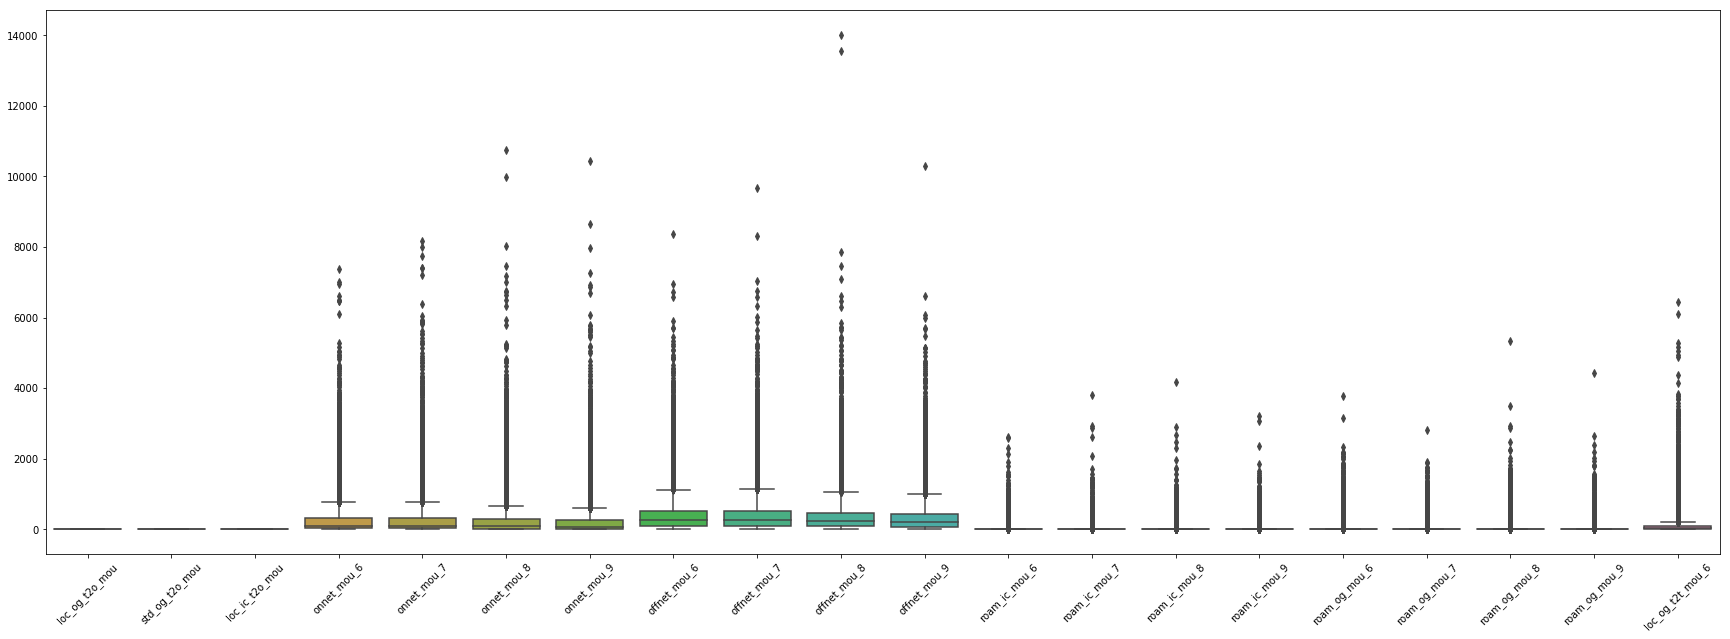

In [36]:


plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[:20]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'loc_og_t2t_mou_7'),
 Text(0,0,'loc_og_t2t_mou_8'),
 Text(0,0,'loc_og_t2t_mou_9'),
 Text(0,0,'loc_og_t2m_mou_6'),
 Text(0,0,'loc_og_t2m_mou_7'),
 Text(0,0,'loc_og_t2m_mou_8'),
 Text(0,0,'loc_og_t2m_mou_9'),
 Text(0,0,'loc_og_t2f_mou_6'),
 Text(0,0,'loc_og_t2f_mou_7'),
 Text(0,0,'loc_og_t2f_mou_8'),
 Text(0,0,'loc_og_t2f_mou_9'),
 Text(0,0,'loc_og_t2c_mou_6'),
 Text(0,0,'loc_og_t2c_mou_7'),
 Text(0,0,'loc_og_t2c_mou_8'),
 Text(0,0,'loc_og_t2c_mou_9'),
 Text(0,0,'loc_og_mou_6'),
 Text(0,0,'loc_og_mou_7'),
 Text(0,0,'loc_og_mou_8'),
 Text(0,0,'loc_og_mou_9'),
 Text(0,0,'std_og_t2t_mou_6')]

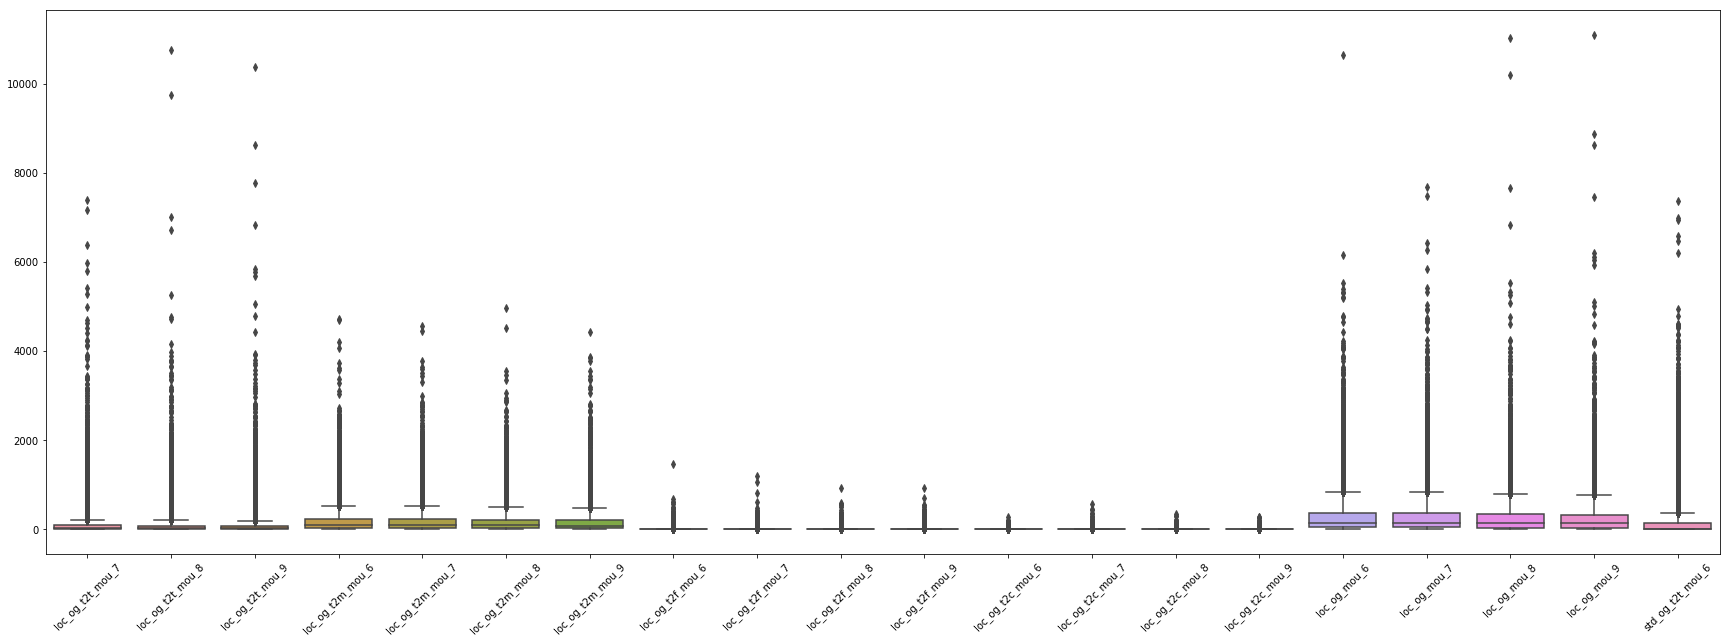

In [37]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[20:40]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'std_og_t2t_mou_7'),
 Text(0,0,'std_og_t2t_mou_8'),
 Text(0,0,'std_og_t2t_mou_9'),
 Text(0,0,'std_og_t2m_mou_6'),
 Text(0,0,'std_og_t2m_mou_7'),
 Text(0,0,'std_og_t2m_mou_8'),
 Text(0,0,'std_og_t2m_mou_9'),
 Text(0,0,'std_og_t2f_mou_6'),
 Text(0,0,'std_og_t2f_mou_7'),
 Text(0,0,'std_og_t2f_mou_8'),
 Text(0,0,'std_og_t2f_mou_9'),
 Text(0,0,'std_og_t2c_mou_6'),
 Text(0,0,'std_og_t2c_mou_7'),
 Text(0,0,'std_og_t2c_mou_8'),
 Text(0,0,'std_og_t2c_mou_9'),
 Text(0,0,'std_og_mou_6'),
 Text(0,0,'std_og_mou_7'),
 Text(0,0,'std_og_mou_8'),
 Text(0,0,'std_og_mou_9'),
 Text(0,0,'isd_og_mou_6')]

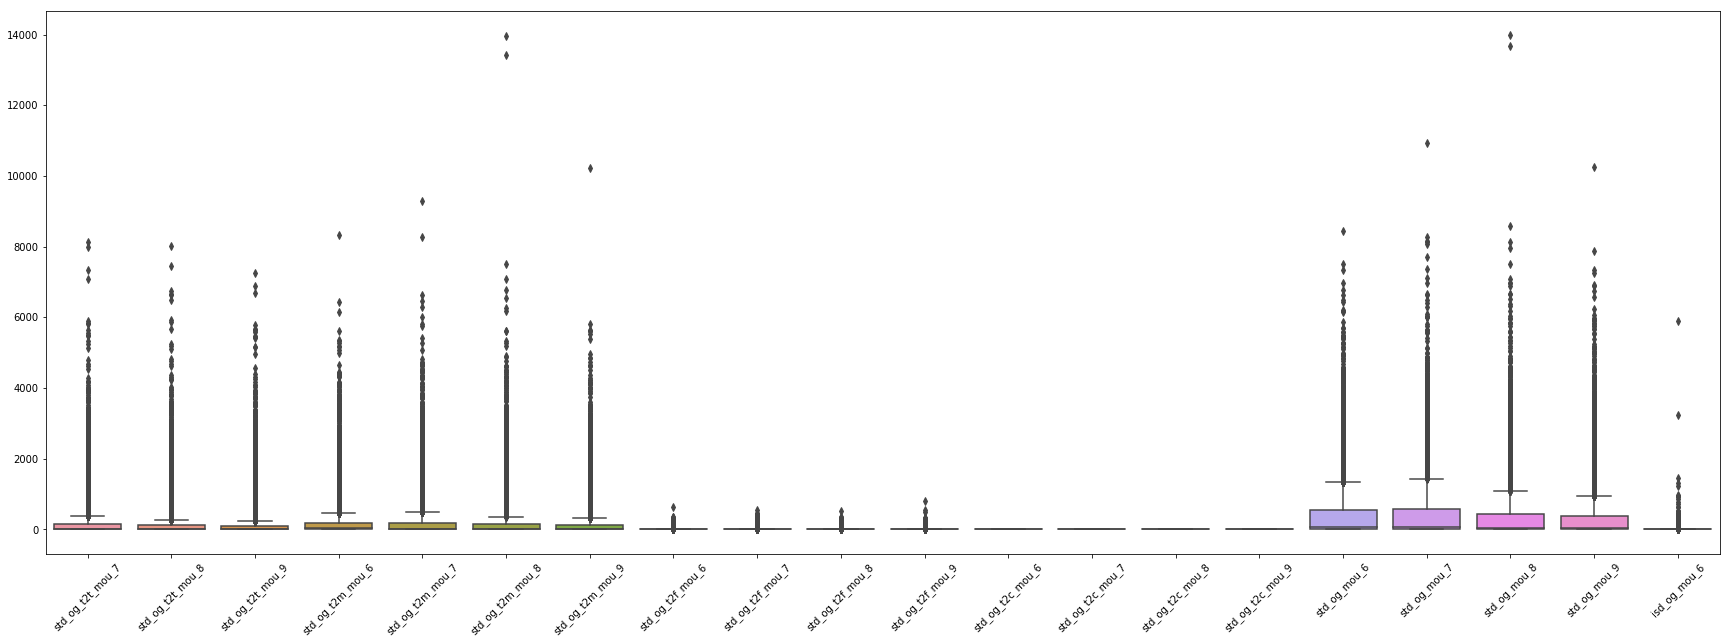

In [38]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[40:60]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'isd_og_mou_7'),
 Text(0,0,'isd_og_mou_8'),
 Text(0,0,'isd_og_mou_9'),
 Text(0,0,'spl_og_mou_6'),
 Text(0,0,'spl_og_mou_7'),
 Text(0,0,'spl_og_mou_8'),
 Text(0,0,'spl_og_mou_9'),
 Text(0,0,'og_others_6'),
 Text(0,0,'og_others_7'),
 Text(0,0,'og_others_8'),
 Text(0,0,'og_others_9'),
 Text(0,0,'loc_ic_t2t_mou_6'),
 Text(0,0,'loc_ic_t2t_mou_7'),
 Text(0,0,'loc_ic_t2t_mou_8'),
 Text(0,0,'loc_ic_t2t_mou_9'),
 Text(0,0,'loc_ic_t2m_mou_6'),
 Text(0,0,'loc_ic_t2m_mou_7'),
 Text(0,0,'loc_ic_t2m_mou_8'),
 Text(0,0,'loc_ic_t2m_mou_9'),
 Text(0,0,'loc_ic_t2f_mou_6')]

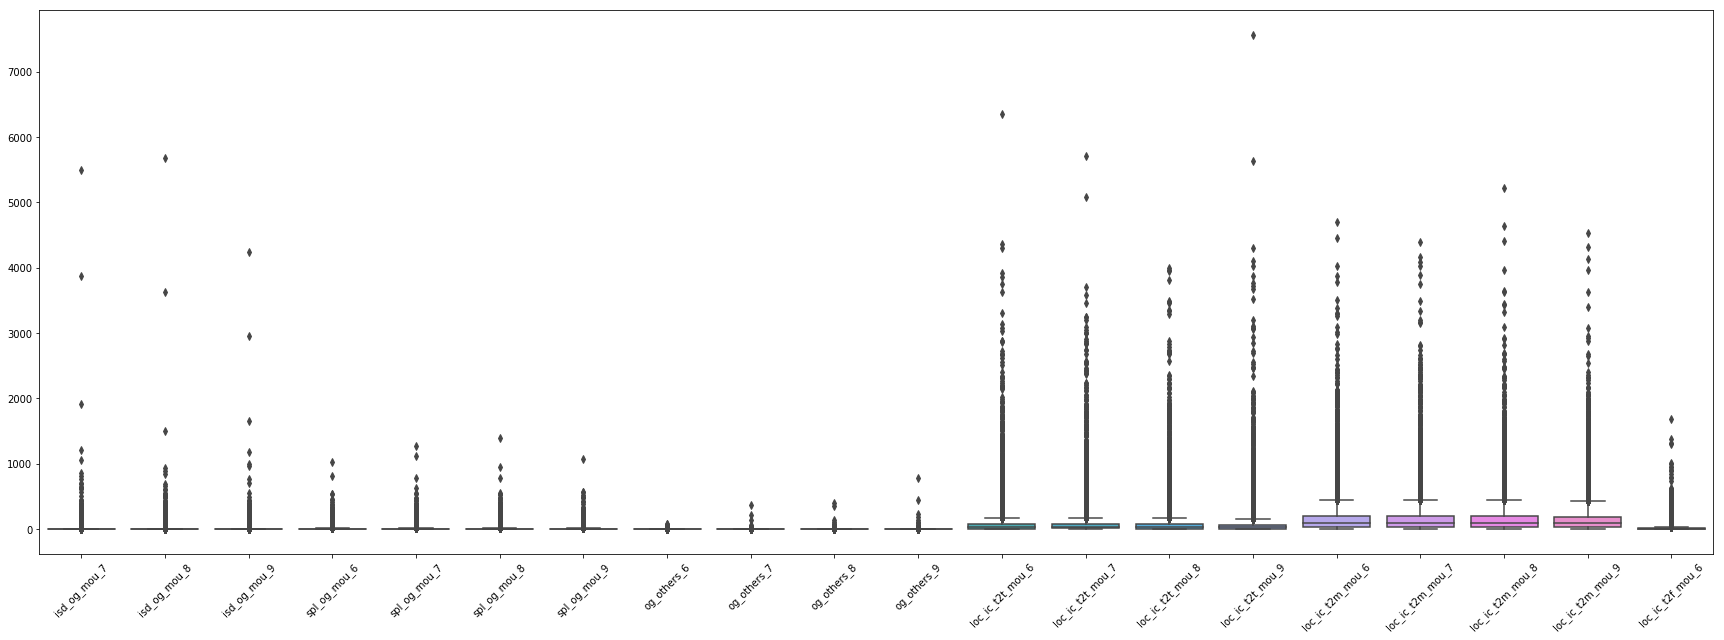

In [39]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[60:80]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'loc_ic_t2f_mou_7'),
 Text(0,0,'loc_ic_t2f_mou_8'),
 Text(0,0,'loc_ic_t2f_mou_9'),
 Text(0,0,'loc_ic_mou_6'),
 Text(0,0,'loc_ic_mou_7'),
 Text(0,0,'loc_ic_mou_8'),
 Text(0,0,'loc_ic_mou_9'),
 Text(0,0,'std_ic_t2t_mou_6'),
 Text(0,0,'std_ic_t2t_mou_7'),
 Text(0,0,'std_ic_t2t_mou_8'),
 Text(0,0,'std_ic_t2t_mou_9'),
 Text(0,0,'std_ic_t2m_mou_6'),
 Text(0,0,'std_ic_t2m_mou_7'),
 Text(0,0,'std_ic_t2m_mou_8'),
 Text(0,0,'std_ic_t2m_mou_9'),
 Text(0,0,'std_ic_t2f_mou_6'),
 Text(0,0,'std_ic_t2f_mou_7'),
 Text(0,0,'std_ic_t2f_mou_8'),
 Text(0,0,'std_ic_t2f_mou_9'),
 Text(0,0,'std_ic_t2o_mou_6')]

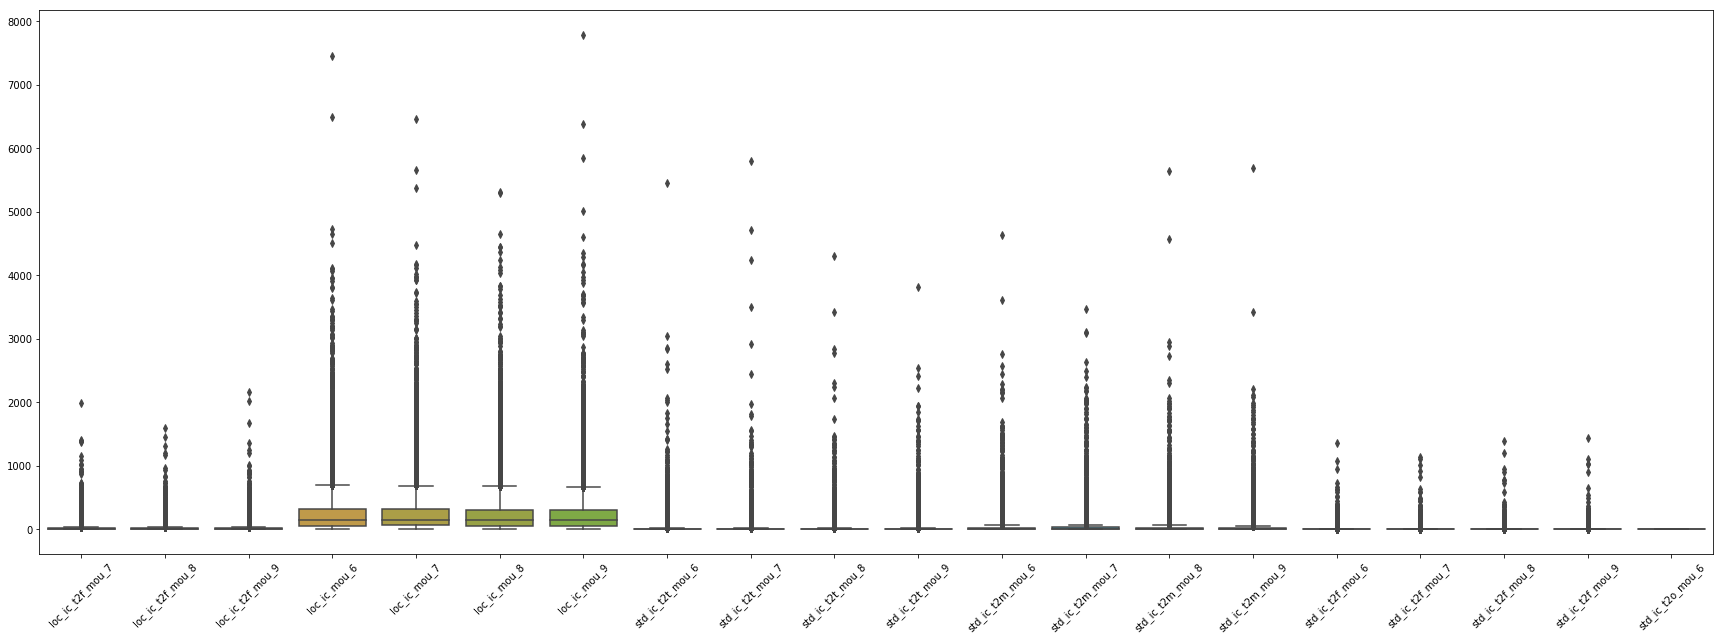

In [40]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[80:100]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'std_ic_t2o_mou_7'),
 Text(0,0,'std_ic_t2o_mou_8'),
 Text(0,0,'std_ic_t2o_mou_9'),
 Text(0,0,'std_ic_mou_6'),
 Text(0,0,'std_ic_mou_7'),
 Text(0,0,'std_ic_mou_8'),
 Text(0,0,'std_ic_mou_9'),
 Text(0,0,'spl_ic_mou_6'),
 Text(0,0,'spl_ic_mou_7'),
 Text(0,0,'spl_ic_mou_8'),
 Text(0,0,'spl_ic_mou_9'),
 Text(0,0,'isd_ic_mou_6'),
 Text(0,0,'isd_ic_mou_7'),
 Text(0,0,'isd_ic_mou_8'),
 Text(0,0,'isd_ic_mou_9'),
 Text(0,0,'ic_others_6'),
 Text(0,0,'ic_others_7'),
 Text(0,0,'ic_others_8'),
 Text(0,0,'ic_others_9'),
 Text(0,0,'max_rech_data_6')]

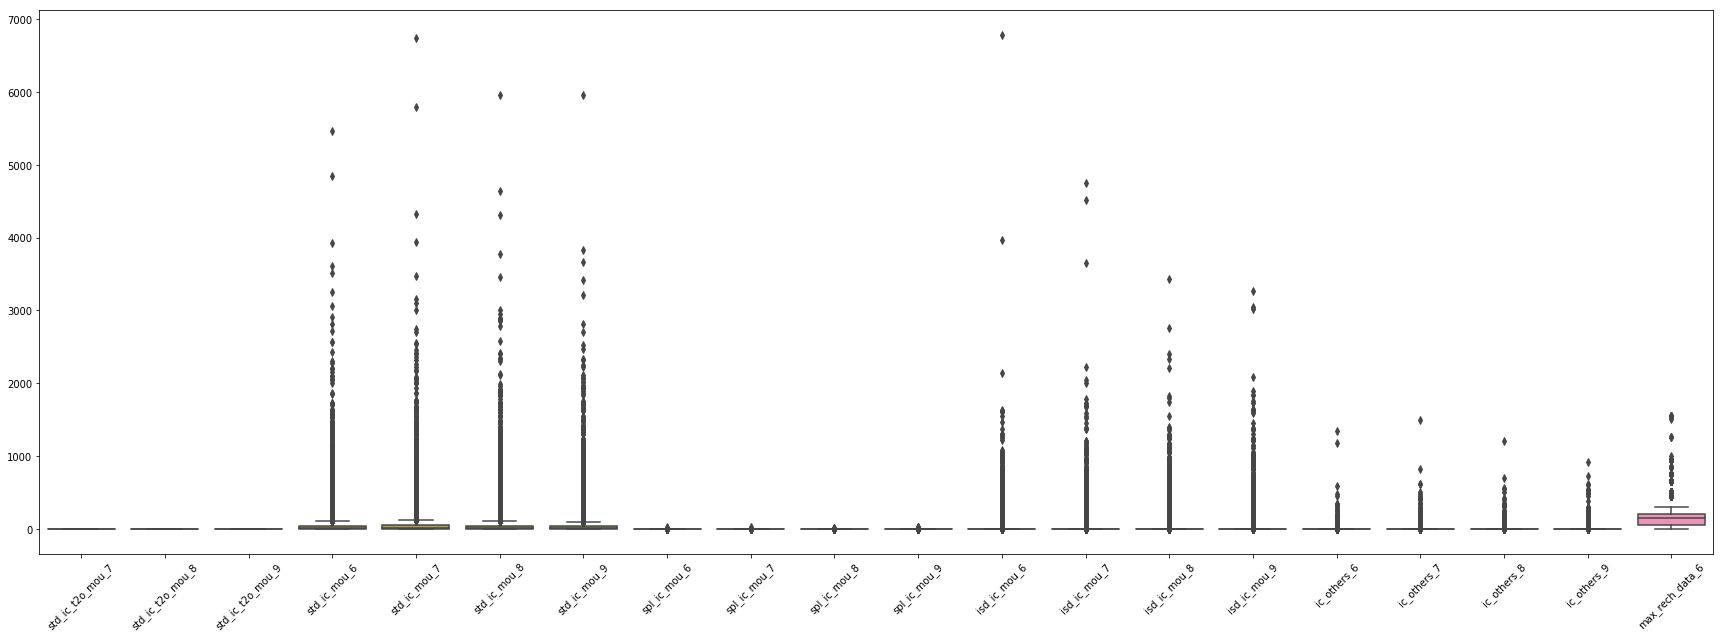

In [41]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[100:120]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'max_rech_data_7'),
 Text(0,0,'max_rech_data_8'),
 Text(0,0,'max_rech_data_9'),
 Text(0,0,'count_rech_2g_6'),
 Text(0,0,'count_rech_2g_7'),
 Text(0,0,'count_rech_2g_8'),
 Text(0,0,'count_rech_2g_9'),
 Text(0,0,'count_rech_3g_6'),
 Text(0,0,'count_rech_3g_7'),
 Text(0,0,'count_rech_3g_8'),
 Text(0,0,'count_rech_3g_9'),
 Text(0,0,'arpu_3g_6'),
 Text(0,0,'arpu_3g_7'),
 Text(0,0,'arpu_3g_8'),
 Text(0,0,'arpu_3g_9'),
 Text(0,0,'arpu_2g_6'),
 Text(0,0,'arpu_2g_7'),
 Text(0,0,'arpu_2g_8'),
 Text(0,0,'arpu_2g_9'),
 Text(0,0,'night_pck_user_6')]

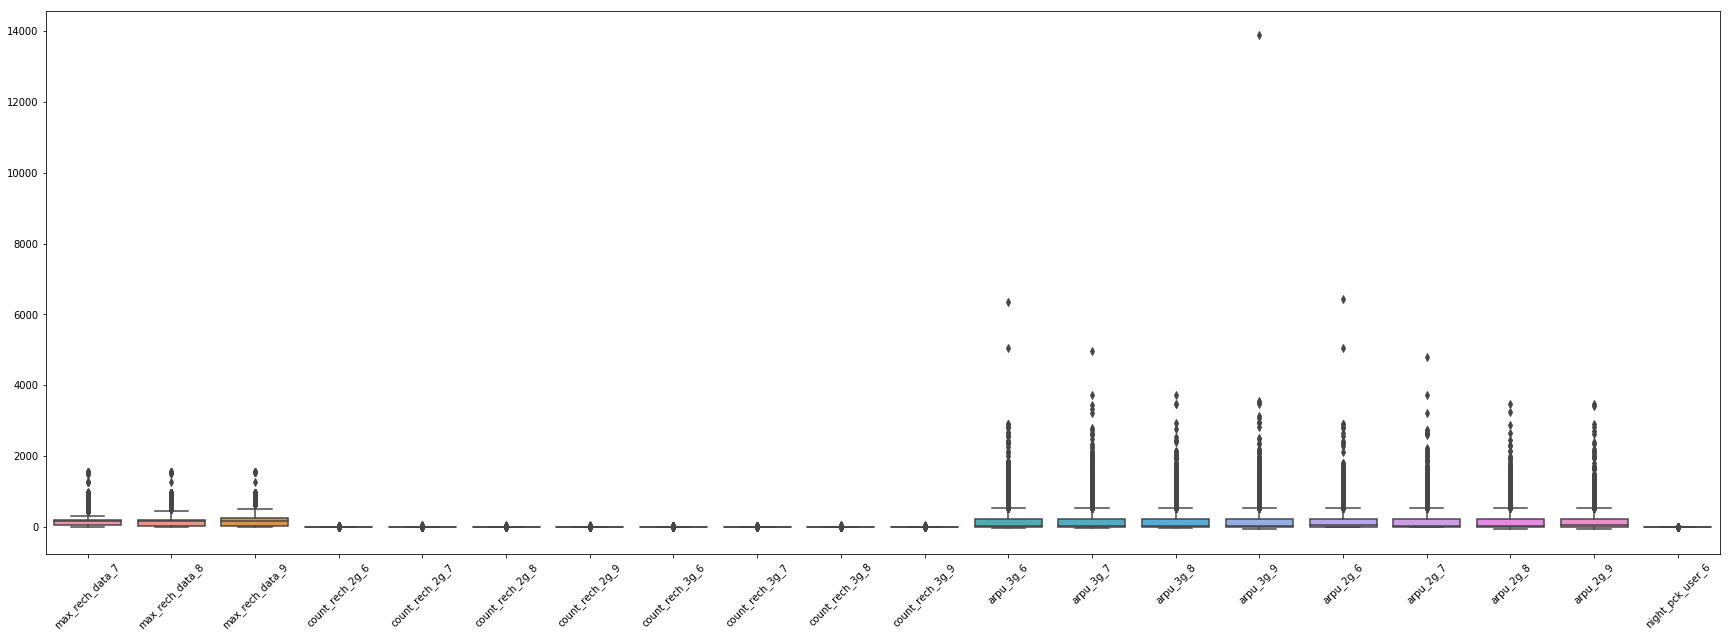

In [42]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[120:140]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0,0,'night_pck_user_7'),
 Text(0,0,'night_pck_user_8'),
 Text(0,0,'night_pck_user_9'),
 Text(0,0,'fb_user_6'),
 Text(0,0,'fb_user_7'),
 Text(0,0,'fb_user_8'),
 Text(0,0,'fb_user_9')]

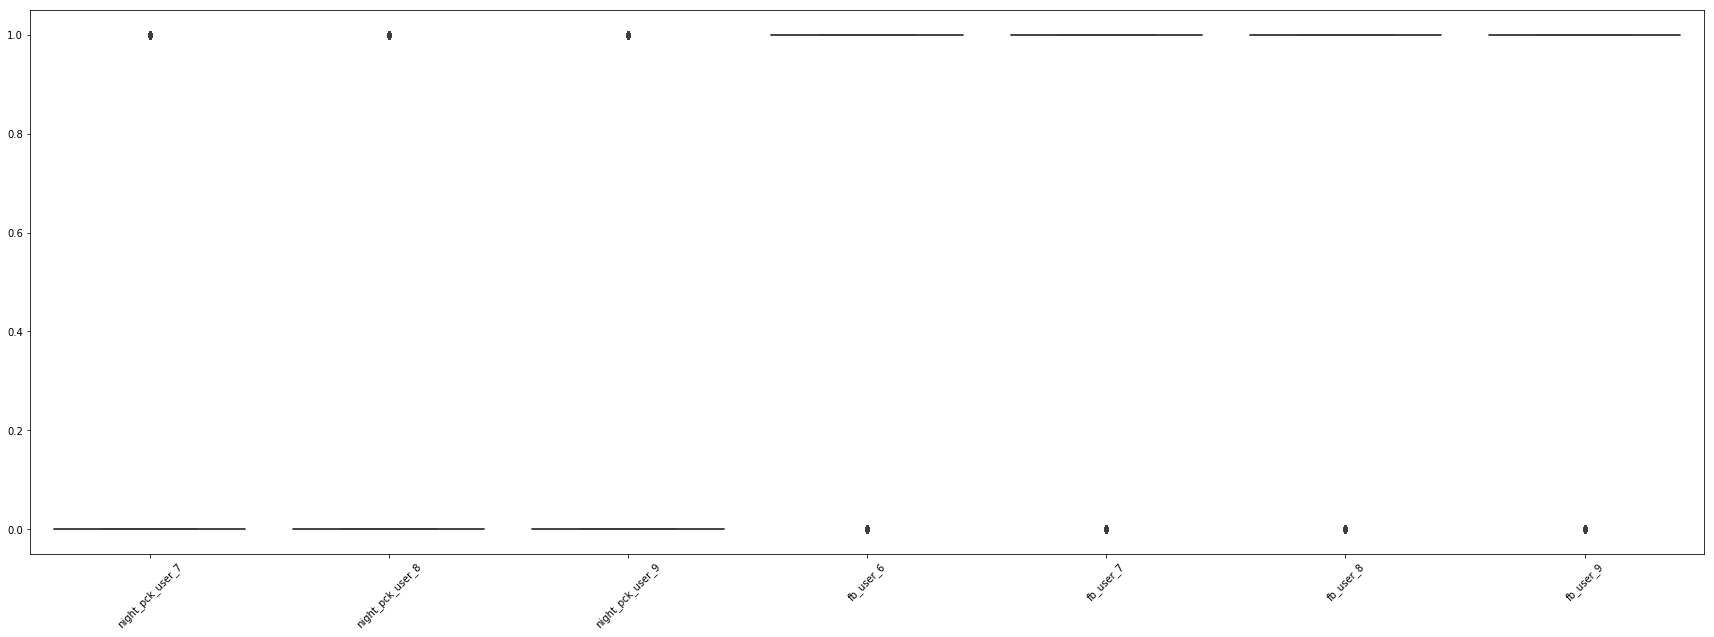

In [43]:
#Box plot with 20 features
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=high_value_cust[cols_explore[140:160]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [44]:
high_value_cust.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.994900e+04    29949.0         29726.0         29726.0   
mean    7.001216e+09      109.0             0.0             0.0   
std     6.867758e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000631e+09      109.0             0.0             0.0   
50%     7.001221e+09      109.0             0.0             0.0   
75%     7.001806e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         29726.0  29949.000000  29949.000000  29949.000000  29949.000000   
mean              0.0    577.006877    578.921924    525.105455    481.919263   
std               0.0    449.261901    469.335744    496.373165    498.689560   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0    345.808000    347.071000    266.252000    219.637000   
50%               0.0    490.933000    489.043000    443.470000    404.792000   
75%               0.0    702.776000    700.512000    666.980000    632.975000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...          fb_user_6     fb_user_7     fb_user_8  \
count  29455.000000      ...       14875.000000  15134.000000  14444.000000   
mean     281.138675      ...           0.920067      0.914563      0.880296   
std      463.649942      ...           0.271198      0.279540      0.324626   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%       29.030000      ...           1.000000      1.000000      1.000000   
50%      106.610000      ...           1.000000      1.000000      1.000000   
75%      325.685000      ...           1.000000      1.000000      1.000000   
max     7376.710000      ...           1.000000      1.000000      1.000000   

          fb_user_9           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  \
count  13928.000000  29949.000000  29949.000000  29949.000000  29949.000000   
mean       0.877154   1244.347958    164.539175    173.749613    153.984264   
std        0.328272    970.958900    419.712551    444.482427    416.280454   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        1.000000    469.000000      0.000000      0.000000      0.000000   
50%        1.000000    884.000000      0.000000      0.000000      0.000000   
75%        1.000000   1864.000000    104.960000    109.700000     75.270000   
max        1.000000   4321.000000  12916.220000   9165.600000  11166.210000   

           vbc_3g_9         churn  
count  29949.000000  29949.000000  
mean       7.556142      0.081839  
std       51.262367      0.274124  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     2618.570000      1.000000  

[8 rows x 215 columns]

In [45]:
#Get all float columns
high_value_cust.select_dtypes(include=['float64']).columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [46]:
#Get all int columns
high_value_cust.select_dtypes(include=['int64']).columns.tolist()

['mobile_number',
 'circle_id',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'aon',
 'churn']

In [47]:
#Get all int columns
high_value_cust.select_dtypes(include=['object']).columns.tolist()

['last_date_of_month_9', 'date_of_last_rech_9', 'date_of_last_rech_data_9']

In [48]:
#Get all data columns to impute
columnstoImpute = ['total_rech_data_6'           
,'total_rech_data_7'           
,'total_rech_data_8'           
,'total_rech_data_9'
,'max_rech_data_6'             
,'max_rech_data_7'             
,'max_rech_data_8'             
,'max_rech_data_9'             
,'count_rech_2g_6'             
,'count_rech_2g_7'             
,'count_rech_2g_8'            
,'count_rech_2g_9'             
,'count_rech_3g_6'             
,'count_rech_3g_7'             
,'count_rech_3g_8'             
,'count_rech_3g_9'             
,'av_rech_amt_data_6'          
,'av_rech_amt_data_7'          
,'av_rech_amt_data_8'          
,'av_rech_amt_data_9'          
,'arpu_3g_6'                   
,'arpu_3g_7'                   
,'arpu_3g_8'                   
,'arpu_3g_9'                   
,'arpu_2g_6'                   
,'arpu_2g_7'                   
,'arpu_2g_8'                  
,'arpu_2g_9']

In [49]:
#Impute the null values with 0 for all data columns
high_value_cust[columnstoImpute] = high_value_cust[columnstoImpute].fillna(0, axis=1)

In [50]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc

night_pack_user and fb_user are categorical variables where 1 indicates usage of the service and null indicates no usage. Lets impute the missing values with -1 and convert the type to category

In [51]:
#Impute the missing values and convert the features to category
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]]=high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].applymap(lambda x: -1 if pd.isnull(x) else 1)
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]] = high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].apply(lambda x: x.astype('category'))

In [52]:
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                -1               -1               -1        -1        -1   
8                -1                1                1        -1         1   
16               -1               -1               -1        -1        -1   
21               -1               -1               -1        -1        -1   

   fb_user_8  
0          1  
7         -1  
8          1  
16        -1  
21        -1

In [53]:
#Get all the data when loc_og_t20_mou are nulls
high_value_cust[pd.isnull(high_value_cust['loc_og_t2o_mou'])]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
687       7001662284        109             NaN             NaN   
2185      7000237332        109             NaN             NaN   
3154      7000606599        109             NaN             NaN   
3506      7002324263        109             NaN             NaN   
3677      7001016201        109             NaN             NaN   
4024      7000102255        109             NaN             NaN   
4190      7000293582        109             NaN             NaN   
5175      7002074759        109             NaN             NaN   
5220      7000635396        109             NaN             NaN   
5539      7001126462        109             NaN             NaN   
6567      7001848388        109             NaN             NaN   
6946      7002368732        109             NaN             NaN   
6984      7001738538        109             NaN             NaN   
8265      7000144821        109             NaN             NaN   
8277      7000664549        109             NaN             NaN   
8363      7000604685        109             NaN             NaN   
8975      7000822092        109             NaN             NaN   
9518      7002391910        109             NaN             NaN   
10879     7001588698        109             NaN             NaN   
11364     7000746562        109             NaN             NaN   
11626     7000145218        109             NaN             NaN   
12154     7000977670        109             NaN             NaN   
12996     7000452408        109             NaN             NaN   
13039     7001097628        109             NaN             NaN   
13289     7000801224        109             NaN             NaN   
13351     7000648567        109             NaN             NaN   
14191     7001546710        109             NaN             NaN   
14458     7001731526        109             NaN             NaN   
15294     7000017705        109             NaN             NaN   
15473     7000041735        109             NaN             NaN   
15858     7000604772        109             NaN             NaN   
17752     7000517729        109             NaN             NaN   
17968     7001135323        109             NaN             NaN   
18435     7000828581        109             NaN             NaN   
19071     7000804932        109             NaN             NaN   
19354     7000717449        109             NaN             NaN   
19415     7000164130        109             NaN             NaN   
19531     7000200593        109             NaN             NaN   
19564     7000455953        109             NaN             NaN   
19971     7001962890        109             NaN             NaN   
20780     7001881970        109             NaN             NaN   
20907     7001590745        109             NaN             NaN   
21259     7002198903        109             NaN             NaN   
21520     7002054480        109             NaN             NaN   
21925     7001601621        109             NaN             NaN   
22781     7000441141        109             NaN             NaN   
23278     7001591982        109             NaN             NaN   
24091     7001037390        109             NaN             NaN   
25471     7001101668        109             NaN             NaN   
25599     7002408423        109             NaN             NaN   
25647     7000121522        109             NaN             NaN   
26622     7000404584        109             NaN             NaN   
26902     7000603259        109             NaN             NaN   
27664     7002023776        109             NaN             NaN   
30524     7002159687        109             NaN             NaN   
30548     7001963722        109             NaN             NaN   
30946     7000255624        109             NaN             NaN   
31024     7001238664        109             NaN             NaN   
31058     7000447866        109             NaN       

'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' are having same null% and are from same customers. So lets impute them with o

In [54]:
#Impute 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' columns with 0's
high_value_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = high_value_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].fillna(0, axis=1)

In [55]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc

In [56]:
pd.set_option("display.max_columns",300)

In [57]:
#Get all the columns having null values when loc_og_t2c_mou_6 is having null value
high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_6'])].columns[high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_6'])].isna().all()].tolist()

['onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

In [58]:
#Get all the columns having null values when loc_og_t2c_mou_7 is having null value
high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_7'])].columns[high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_7'])].isna().all()].tolist()

['onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7']

In [59]:
#Get all the columns having null values when loc_og_t2c_mou_8 is having null value
high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_8'])].columns[high_value_cust[pd.isnull(high_value_cust['loc_og_t2c_mou_8'])].isna().all()].tolist()

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [60]:
#Lets check if any of the rows having all data or call columns with null values 
high_value_cust.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                     'last_date_of_month_9','rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8'], axis=1).isna().all()

loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
arpu_6                      False
arpu_7                      False
arpu_8                      False
arpu_9                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
onnet_mou_9                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
offnet_mou_9                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_ic_mou_9               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
roam_og_mou_9               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2t_mou_9            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou

Since none of the rows exist where all the date and call columns are having null values. So the null values are independent of data and calls and support our earlier assumption that the null values indicate no usage of service rather than having missing values and so can be imputed by zeros

In [61]:
#Get the info of the dataframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 233 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(173), int64(36), object(3)
memory usage: 51.1+ MB


In [62]:
#Exclude the date and category columns from the dataset and impute with 0
high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [63]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
onnet_mou_9                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
offnet_mou_9                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_ic_mou_9                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
roam_og_mou_9                0.00
loc

In [64]:
#Get all the columns ending with 9. All the columns of month 9
month_9_cols = [col for col in high_value_cust.columns if '9' in col]
month_9_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [65]:
#Remove the month 9 columns since they are not necessary for prediction
high_value_cust = high_value_cust.drop(month_9_cols, axis=1)

In [66]:
#Get the dataframe info
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 178 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(129), int64(28)
memory usage: 38.5 MB


In [67]:
#Get first few rows in the dataframe
high_value_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            2014-06-30           2014-07-31           2014-08-31   197.385   
7            2014-06-30           2014-07-31           2014-08-31  1069.180   
8            2014-06-30           2014-07-31           2014-08-31   378.721   
16           2014-06-30           2014-07-31           2014-08-31   430.975   
21           2014-06-30           2014-07-31           2014-08-31   514.453   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
16   299.869   187.894        50.51        74.01        70.61        296.29   
21   597.753   637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
16        229.74        162.76           0.00           2.83           0.00   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
16           0.00          17.74           0.00             42.61   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
16             65.16             67.38            273.29            145.99   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
16            128.28              0.00              4.48             10.26   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
16               0.0               0.0              0.00        315.91   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
16        215.64    

In [68]:
#Get the mterics of all numeric columns
high_value_cust.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.994900e+04    29949.0         29949.0         29949.0   
mean    7.001216e+09      109.0             0.0             0.0   
std     6.867758e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000631e+09      109.0             0.0             0.0   
50%     7.001221e+09      109.0             0.0             0.0   
75%     7.001806e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29949.0  29949.000000  29949.000000  29949.000000  29949.000000   
mean              0.0    577.006877    578.921924    525.105455    276.501375   
std               0.0    449.261901    469.335744    496.373165    461.202260   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    345.808000    347.071000    266.252000     26.410000   
50%               0.0    490.933000    489.043000    443.470000    102.690000   
75%               0.0    702.776000    700.512000    666.980000    319.590000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29949.000000  29949.000000  29949.000000  29949.000000  29949.000000   
mean     284.502051    248.826141    393.905095    398.808925    352.778474   
std      483.088197    462.953151    478.888295    494.947243    480.726120   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       25.540000     16.930000     98.510000     96.210000     66.890000   
50%      100.530000     79.680000    251.340000    247.640000    209.510000   
75%      322.760000    265.710000    507.610000    512.380000    459.710000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29949.000000   29949.000000   29949.000000   29949.000000   
mean       16.762548      13.064450      12.935777      27.846859   
std        77.987846      75.891264      74.540335     117.450921   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29949.000000   29949.000000      29949.000000      29949.000000   
mean       21.028152      20.624408         89.380138         90.486707   
std        97.074048     105.306013        233.327427        246.131386   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          6.160000          6.640000   
50%         0.000000       0.000000         28.410000         28.530000   
75%         0.000000       0.000000         84.340000         84.910000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29949.000000      29949.000000      29949.000000      29949.000000   
mean          82.295146        171.751292        171.409086        159.126265   
std          231.761888        250.655183        241.535200        234.488226   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.960000         24.540000         26.940000         17.760000   
50%           24.540000         87.610000         89.890000         78.030000   
75%           77.760000        223.110000        221.960000        209.540000   
max        1075

The columns 'mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8' have no new information to provide to the learning algorithm so lets drop them

In [69]:
#Drop the columns
high_value_cust = high_value_cust.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                     'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [70]:
#Get the info of the dataframe after dropiing columns
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 167 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(120), int64(26)
memory usage: 36.0 MB


In [71]:
#Get the metrics of remaining columns
high_value_cust.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29949.000000  29949.000000  29949.000000  29949.000000  29949.000000   
mean     577.006877    578.921924    525.105455    276.501375    284.502051   
std      449.261901    469.335744    496.373165    461.202260    483.088197   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      345.808000    347.071000    266.252000     26.410000     25.540000   
50%      490.933000    489.043000    443.470000    102.690000    100.530000   
75%      702.776000    700.512000    666.980000    319.590000    322.760000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29949.000000  29949.000000  29949.000000  29949.000000   29949.000000   
mean     248.826141    393.905095    398.808925    352.778474      16.762548   
std      462.953151    478.888295    494.947243    480.726120      77.987846   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       16.930000     98.510000     96.210000     66.890000       0.000000   
50%       79.680000    251.340000    247.640000    209.510000       0.000000   
75%      265.710000    507.610000    512.380000    459.710000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29949.000000   29949.000000   29949.000000   29949.000000   
mean       13.064450      12.935777      27.846859      21.028152   
std        75.891264      74.540335     117.450921      97.074048   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29949.000000      29949.000000      29949.000000      29949.000000   
mean       20.624408         89.380138         90.486707         82.295146   
std       105.306013        233.327427        246.131386        231.761888   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.160000          6.640000          3.960000   
50%         0.000000         28.410000         28.530000         24.540000   
75%         0.000000         84.340000         84.910000         77.760000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29949.000000      29949.000000      29949.000000      29949.000000   
mean         171.751292        171.409086        159.126265          6.730625   
std          250.655183        241.535200        234.488226         22.435297   
min            0.000000          0.000000          0.000000          0.000000   
25%           24.540000         26.940000         17.760000          0.000000   
50%           87.610000         89.890000         78.030000          0.260000   
75%          223.110000        221.960000        209.540000          4.840000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29949.000000      29949.000000      29949.000000      29949.000000   
mean           6.823537          6.243495          1.544452          1.850070   
std           22.347228         19.920786          6.230262          9.100901   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.330000          0.0500

The columns roam_ic_mou, roam_og_mou, loc_og_t2f_mou, loc_og_t2c_mou, loc_og_t2c_mou, std_og_t2f_mou, isd_og_mou, spl_og_mou, og_others, std_ic_t2f_mou, spl_ic_mou, isd_ic_mou, ic_others, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, vol_2g_mb, vol_3g_mb, arpu_3g, arpu_2g, night_pck_user, monthly_2g, monthly_sachet_2g, monthly_3g,montlhy_sachet_3g, fbb_user, vbc_3g all are having values 0 for more than 50% of datapoints. So lets create a new dataframe to have totals of all three monehts for respective features

In [72]:
#Create a new dataframe
total_data = pd.DataFrame()

In [73]:
#Get columns excluding date columns
cols = high_value_cust.select_dtypes(exclude=['datetime64[ns]','object','category']).columns.tolist()

In [74]:
#Remove aon and churn columns
cols.remove('aon')
cols.remove('churn')

In [75]:
#Create an empty list
sublist=[]

#Get the columns names removing last two characters
for col in cols:
    sublist.append(col[:-2])

In [76]:
#Import ordered dict package
from collections import OrderedDict

#Get unique column names after removing last two characters into a list
collist=[]
collist=list(OrderedDict.fromkeys(sublist))
collist

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g']

In [77]:
#Loop through all the unique features, append 6,7,8 and add the totals to the new dataframe
for col in collist:
    total_data['total_'+col] = high_value_cust[col+'_6']+high_value_cust[col+'_7']+high_value_cust[col+'_8']

In [78]:
#Add back churn and aon columns to new dataframe
total_data['aon'] = high_value_cust['aon']
total_data['churn'] = high_value_cust['churn']

In [79]:
#Get first few rows of new dataframe
total_data.head()

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
0      626.004             0.00              0.00               0.00   
7     5590.510           164.81           1346.50              81.36   
8     1008.306           799.80            311.77               0.00   
16     918.738           195.13            688.79               2.83   
21    1749.966           319.66           2638.00               0.00   

    total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
0                0.00                  0.00                  0.00   
7               74.39                123.05                918.29   
8                0.00                527.21                202.08   
16              17.74                175.15                547.56   
21               0.00                 33.98                284.55   

    total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
0                   0.00                  0.00              0.00   
7                 170.50                  0.00           1211.86   
8                   0.00                  7.15            729.31   
16                 14.74                  0.00            737.48   
21                  2.33                  0.00            320.87   

    total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
0                   0.00                  0.00                  0.00   
7                  39.60                130.79                 43.42   
8                 272.57                 99.42                  0.00   
16                 13.70                105.79                  0.00   
21                285.66               2351.09                  0.00   

    total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
0               0.00              0.00              0.00              0.0   
7             213.84             10.19             11.00              0.0   
8             372.02              0.00             10.23              0.0   
16            119.51              0.00              9.17              0.0   
21           2636.77              0.00              0.00              0.0   

    total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
0                 0.00                  0.16                  4.13   
7              1446.93                117.71                560.24   
8              1111.58                 33.99                 87.04   
16              866.20                141.66                526.66   
21             2957.67                 32.21                322.02   

    total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
0                   1.15              5.44                  0.00   
7                 293.15            971.15                 79.11   
8                   0.00            121.05                  0.68   
16                 50.10            718.47                153.76   
21                 17.84            372.12                 20.22   

    total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
0                   0.00                  0.00              0.00   
7                 359.76                108.64            547.56   
8                  27.16                  0.00             27.84   
16                165.69                  2.69            322.16   
21                207.66                  0.00            227.90   

    total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  total_ic_others  \
0                 5.44              0.00              0.00             0.00   
7              1613.24              0.21             48.18            46.07   
8               148.89              0.00              0.00             0.00   
16             1040.88              0.00              0.23             0.00   
21              600.02              0.00              0.00             0.00   

    total_total_rech_num  total_total_rech_amt  total_max_rech_amt  \
0                      9                   866                 756 

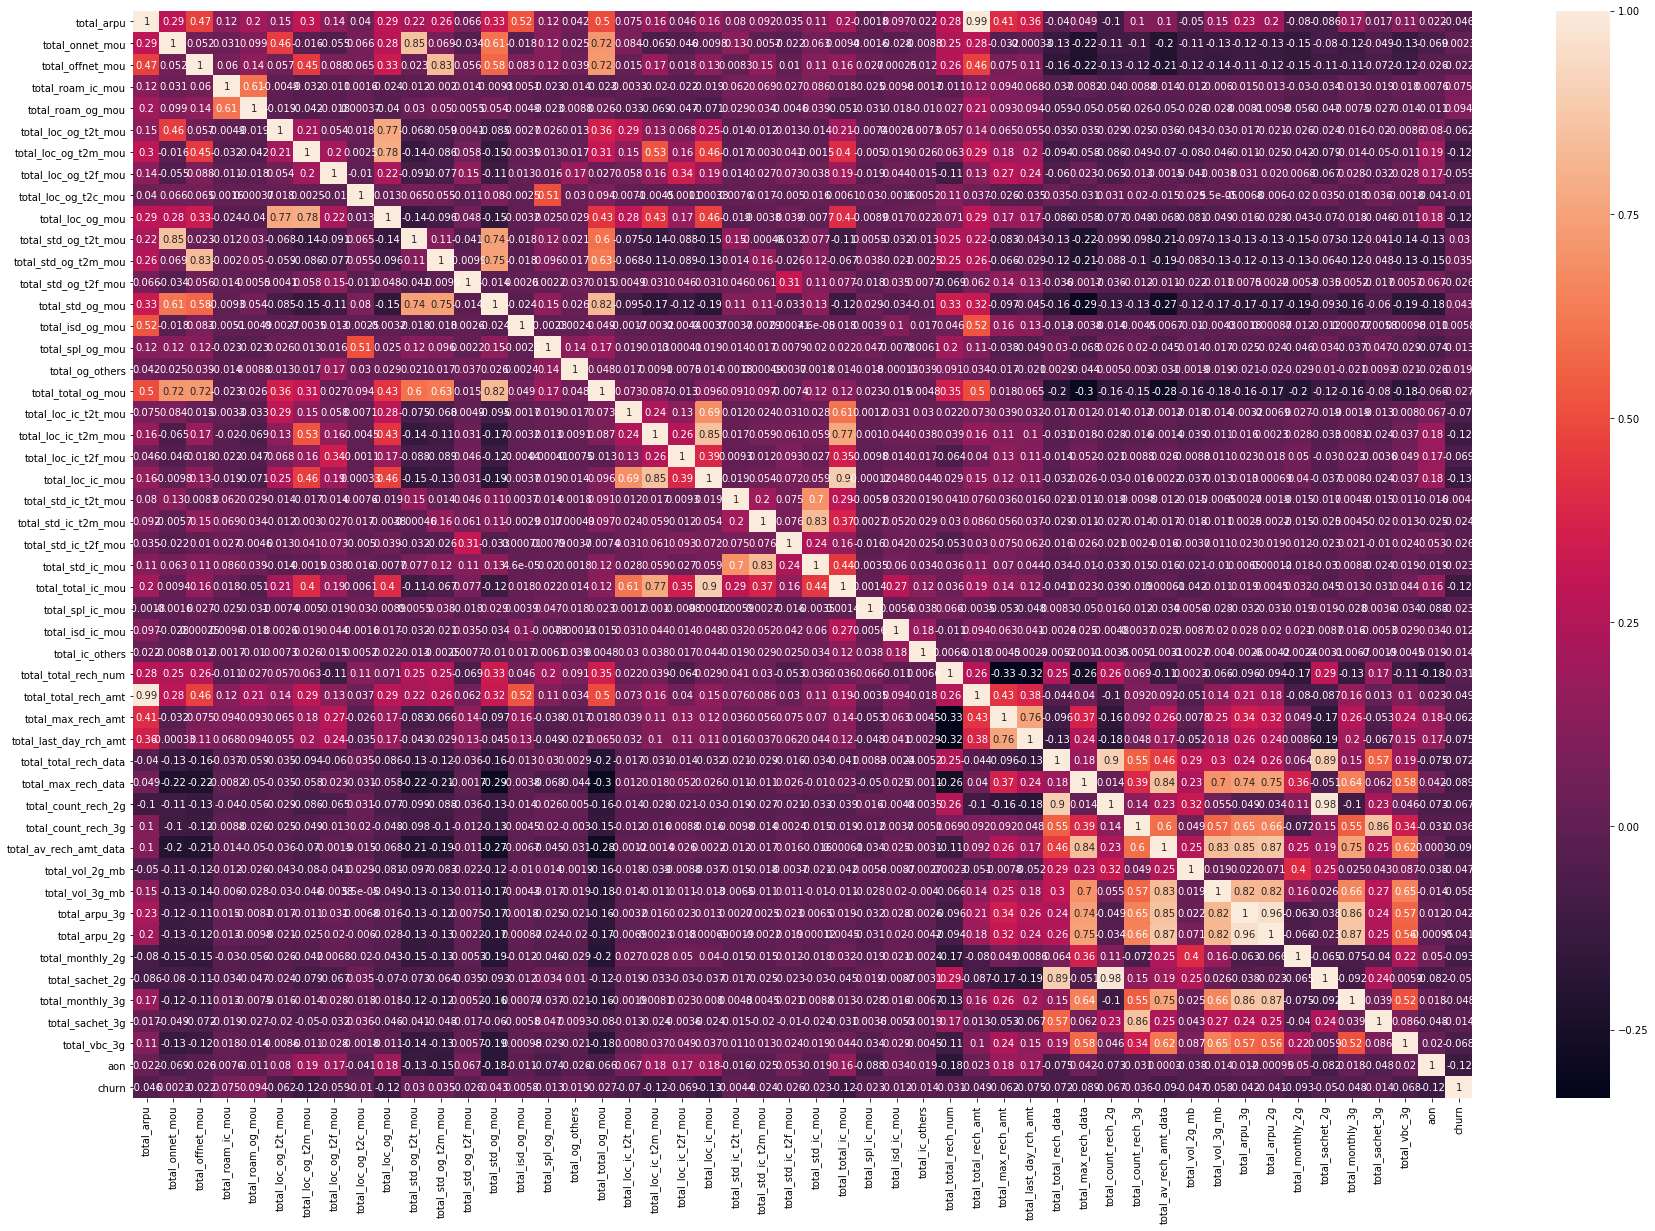

In [80]:
#Lets plot the correlation matrix of new dataframe

#%matplotlib inline
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(total_data.corr(),annot = True)

This is the correlation of summation dataframe so it represents the same correlation characteristics of our original dataframe features
<br>
total_arpu and total_rech_amt are highly correlated. The arpu is highly dependendent on the total amount recharged by the customers for calls than data
<br>
Onnet_mou is highly depended on std_og_t2t (same network) and offnet_mou is dependednt on std_og_t2m(Other network)
<br>
total loc_og_mou is dependent on loc_og_t2t and loc_og_t2m
<br>
Also total og_mou and onnet mou is highly dependent on std_og_mou
<br>
Total loc_mou is highly dependent on loc_t2t_mou and total_std_mou is dependent on std_t2m_mou. So customers are getting local incoming calls mostly from the same network but getting std incoming calls from other networks
<br>
Total_rech_amt is correlated with last_day_rech_amt. So mostly customers are recharging only once
<br>
arpu_2g and arpu_3g are highly correlated. 2g_rech_amt is correlated with 2g_sachets and 3g_rech_mt is correlated with monthly. So customers are preferring to do 3g recharges monthly data packs while 2g they are preferring to do it in sachets. Mostly data columns are highly correlated with each other

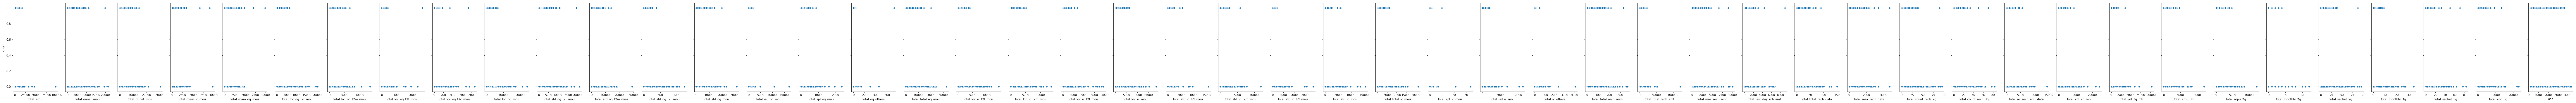

In [81]:
#Pair plot of all the columns with respect to churn
sns.pairplot(total_data, x_vars=total_data.drop('churn', axis=1).columns, y_vars='churn', size=5, aspect=0.5,kind='scatter')

There are outliers present in some of the columns, lets observe them and remove the outliers 

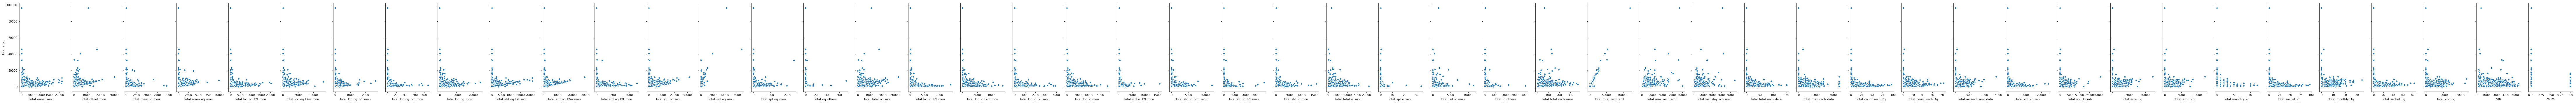

In [82]:
sns.pairplot(total_data, x_vars=total_data.drop('total_arpu', axis=1).columns, y_vars='total_arpu', size=5, aspect=0.5,kind='scatter')

In [83]:
#Outliers in total_arpu
total_data[total_data['total_arpu']>40000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
38610   96420.546            17.84          10725.83                0.0   
51314   46152.276             0.18          17232.18                1.0   
67717   40614.779            37.53           4913.58                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
38610               0.00                 17.84                 11.20   
51314             139.98                  0.18                  0.00   
67717               0.00                 37.53                 43.21   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
38610                  0.00                  0.00             29.06   
51314                  0.60                  9.68              0.78   
67717                  3.35                  0.15             84.11   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
38610                   0.0                  0.18                   0.0   
51314                   0.0                  2.05                   0.0   
67717                   0.0                 11.02                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
38610              0.18          10727.21              0.00              0.0   
51314              2.05          17072.48             19.74              0.0   
67717             11.02           4869.62              0.15              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
38610            10756.48                 35.42                 18.15   
51314            17095.07                  0.59                  0.05   
67717             4964.93                 42.78                 28.20   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
38610                  1.43             55.01                  2.28   
51314                  0.35              0.99                  3.98   
67717                  0.00             71.00                  1.54   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
38610                  5.06                  0.00              7.34   
51314                  0.00                  1.78              5.76   
67717                 35.16                  0.00             36.71   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
38610             1672.78              0.19           1597.74   
51314               10.65              0.41              2.75   
67717              578.33              0.00            470.58   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
38610            12.43                    65                120845   
51314             0.71                   126                 53479   
67717             0.00                   131                 45380   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
38610                9300                    6235                    0.0   
51314                3169                    1500                    2.0   
67717                6550                    6450                    0.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
38610                  0.0                  0.0                  0.0   
51314                504.0                  0.0                  2.0   
67717                  0.0                  0.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
38610                     0.0             0.00             0.00   
51314                   504.0            26.42           833.73   
67717                     0.0             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
38610           0.00           0.00                 0                0   
51314         424.34         424.34                 0                0   
67717           0.00

In [84]:
#Outliers in total_offnet_mou
total_data[total_data['total_offnet_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035                2255.2              29126.03                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18             707.7             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                   0.0            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035              0.0                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                    1.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                 14.0                  1.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                    14.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035            0.0            0.0                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
33035                 0                0           0.0  423      0

In [85]:
#Outliers in total_roam_ic
total_data[total_data['total_roam_ic_mou']>9500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
28436    1238.586           366.65            887.01             9716.2   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
28436            1099.49                 83.73                 61.58   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
28436                   0.0                  0.58            145.33   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
28436                   3.1                  2.44                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
28436              5.54               0.0              3.28              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
28436              154.17                119.85                 23.09   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
28436                 17.03            159.98                   0.0   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
28436                   4.7                   0.0               4.7   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
28436              164.68               0.0               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
28436              0.0                    23                  1411   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
28436                 365                     365                    4.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
28436                435.0                  0.0                  4.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
28436                   580.0            30.48          1217.47   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
28436         497.88         488.28                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
28436                 4                0        362.96  383      0

In [86]:
#Outliers in total_roam_og_mou
total_data[total_data['total_roam_og_mou']>7500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
74987      8101.6          8394.67           1502.15              27.66   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
74987            9896.82                   0.0                   0.0   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
74987                   0.0                   0.0               0.0   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
74987                   0.0                   0.0                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
74987               0.0               0.0               0.0              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
74987                 0.0                   0.0                   0.0   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
74987                   0.0               0.0                   0.0   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
74987                   0.0                   0.0               0.0   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
74987                 0.0               0.0               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
74987              0.0                    23                 11354   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
74987                8966                    8966                    0.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
74987                  0.0                  0.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
74987                     0.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
74987            0.0            0.0                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
74987                 0                0           0.0  300      1

In [87]:
#Outliers in total_loc_og_t2f_mou
total_data[total_data['total_loc_og_t2f_mou']>2000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
67497    4478.437            29.61           2675.15               0.00   
95046    7318.820           395.73           5203.92              92.46   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
67497                0.0                 29.61                312.41   
95046             1625.7                 40.10                  4.85   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
67497               2357.03                  5.68           2699.10   
95046               2673.84                  0.00           2718.81   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
67497                   0.0                  0.00                  0.00   
95046                 116.7                 10.44                380.41   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
67497              0.00              0.00              8.54             0.00   
95046            507.58             63.27            684.26           720.96   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
67497             2707.65                 86.76                725.88   
95046             4694.95                 16.99                  1.89   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
67497               3296.79           4109.48                  1.24   
95046                  0.00             18.88                 88.92   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
67497                  0.53                  0.00              1.78   
95046                 32.24                112.75            233.93   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
67497             4111.61              0.33              0.01   
95046              339.78              0.00             86.94   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
67497              0.0                    86                  5313   
95046              0.0                    14                  6500   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
67497                 948                     213                    0.0   
95046                3000                    1500                    0.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
67497                  0.0                  0.0                  0.0   
95046                  0.0                  0.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
67497                     0.0              0.0              0.0   
95046                     0.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
67497            0.0            0.0                 0                0   
95046            0.0            0.0                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
67497                 0                0          0.00  838      0  
95046                 0                0        151.52  262      1

In [88]:
#Outliers in total_std_og_t2m_mou
total_data[total_data['total_std_og_t2m_mou']>20000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035                2255.2              29126.03                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18             707.7             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                   0.0            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035              0.0                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                    1.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                 14.0                  1.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                    14.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035            0.0            0.0                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
33035                 0                0           0.0  423      0

In [89]:
#Outliers in total_std_og_mou
total_data[total_data['total_std_og_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035                2255.2              29126.03                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18             707.7             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                   0.0            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035              0.0                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                    1.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                 14.0                  1.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                    14.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035            0.0            0.0                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
33035                 0                0           0.0  423      0

In [90]:
#Outliers in total_isd_og_mou
total_data[total_data['total_isd_og_mou']>15000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
51314   46152.276             0.18          17232.18                1.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
51314             139.98                  0.18                   0.0   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
51314                   0.6                  9.68              0.78   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
51314                   0.0                  2.05                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
51314              2.05          17072.48             19.74              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
51314            17095.07                  0.59                  0.05   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
51314                  0.35              0.99                  3.98   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
51314                   0.0                  1.78              5.76   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
51314               10.65              0.41              2.75   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
51314             0.71                   126                 53479   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
51314                3169                    1500                    2.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
51314                504.0                  0.0                  2.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
51314                   504.0            26.42           833.73   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
51314         424.34         424.34                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
51314                 2                0       1094.61  289      0

In [91]:
#Outliers in total_og_others
total_data[total_data['total_og_others']>600]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
95046     7318.82           395.73           5203.92              92.46   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
95046             1625.7                  40.1                  4.85   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
95046               2673.84                   0.0           2718.81   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
95046                 116.7                 10.44                380.41   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
95046            507.58             63.27            684.26           720.96   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
95046             4694.95                 16.99                  1.89   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
95046                   0.0             18.88                 88.92   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
95046                 32.24                112.75            233.93   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
95046              339.78               0.0             86.94   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
95046              0.0                    14                  6500   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
95046                3000                    1500                    0.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
95046                  0.0                  0.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
95046                     0.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
95046            0.0            0.0                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
95046                 0                0        151.52  262      1

In [92]:
#Outliers in total_total_og_mou
total_data[total_data['total_total_og_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035                2255.2              29126.03                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18             707.7             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                   0.0            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035              0.0                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                    1.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                 14.0                  1.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                    14.0              0.0              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035            0.0            0.0                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
33035                 0                0           0.0  423      0

In [93]:
#Outliers in total_loc_ic_t2t_mou
total_data[total_data['total_loc_ic_t2t_mou']>12000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
34952    2785.079          1438.76           1142.54                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
34952                0.0               1201.29                536.78   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
34952                  36.3                 35.29            1774.4   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
34952                237.02                441.22                 10.02   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
34952            688.28               0.0            129.35             2.14   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
34952             2594.21              14126.61                 813.2   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
34952                353.55           15293.4                317.55   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
34952                345.94                 24.33            687.87   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
34952            16000.67               0.0             13.99   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
34952              5.4                    44                  3113   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
34952                 395                     395                    1.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
34952                175.0                  1.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
34952                   175.0            57.18             1.66   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
34952            0.0            7.4                 1                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
34952                 0                0          1.89  605      0

In [94]:
#Outliers in total_std_ic_t2m_mou
total_data[total_data['total_std_ic_t2m_mou']>10000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
12898    2019.799           421.58           3518.78              24.13   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
12898              16.85                 24.83                233.33   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
12898                   0.0                 39.01            258.18   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
12898                396.74               3215.29                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
12898           3612.05               0.0             71.63              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
12898              3941.9                  31.3                182.78   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
12898                   0.0            214.09                563.71   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
12898              11891.03                 27.05          12481.83   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
12898            12695.95               0.0               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
12898              0.0                    38                  2383   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
12898                 450                     111                    2.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
12898                 14.0                  2.0                  0.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
12898                    28.0            57.92              0.0   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
12898            0.0           5.15                 0                2   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
12898                 0                0           0.0  221      0

In [95]:
#Outliers in total_isd_ic_mou
total_data[total_data['total_isd_ic_mou']>7500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
71514    1758.512           278.68            612.53                0.0   
83599    3386.160           111.60            578.20                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
71514                0.0                222.19                210.52   
83599                0.0                111.27                392.88   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
71514                 21.66                  0.00            454.41   
83599                138.38                 13.34            642.56   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
71514                 56.47                 38.69                   0.0   
83599                  0.00                  0.78                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
71514             95.17            341.62              0.00              0.0   
83599              0.78             43.57             13.34              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
71514              891.23                258.96                 78.52   
83599              700.29                 91.67                385.11   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
71514                 12.52            350.04                140.27   
83599                 29.85            506.66                  0.56   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
71514                 75.28                  6.73            222.30   
83599                 27.51                 29.35             57.42   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
71514            12360.53              0.00          11418.48   
83599            11009.48              0.33          10375.71   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
71514           369.66                    17                  2292   
83599            69.28                    20                  3918   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
71514                 685                     458                    4.0   
83599                1662                     500                    6.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
71514                648.0                  3.0                  1.0   
83599               1662.0                  0.0                  6.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
71514                   846.0           511.25          2228.54   
83599                  2418.0            30.70         12787.07   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
71514         454.00         258.27                 3                0   
83599        2218.95        2052.50                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g   aon  churn  
71514                 1                0       2324.84   796      0  
83599                 6                0       5523.35  2372      0

In [96]:
#Outliers in total_arpu_2g
total_data[total_data['total_arpu_2g']>10000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
27531    12204.97              0.0             11.92                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
27531                0.0                   0.0                  0.53   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
27531                   0.0                 10.24              0.53   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
27531                   0.0                   0.0                   0.0   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
27531               0.0               0.0             11.39              0.0   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
27531               11.92                   0.0                   0.0   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
27531                   0.0               0.0                   0.0   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
27531                   0.0                   0.0               0.0   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
27531                0.03              0.03               0.0   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
27531              0.0                    15                 14376   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
27531                4665                    4665                   10.0   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
27531               4665.0                  0.0                 10.0   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
27531                 14346.0             0.27        103371.75   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
27531        12248.3       12248.25                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  churn  
27531                10                0       6445.67  222      0

In [97]:
#Since these are few datapoints lets remove the outliers in both total and high_value_cust dataframes
high_value_cust = high_value_cust.drop(total_data[total_data['total_arpu']>40000].index)
total_data = total_data.drop(total_data[total_data['total_arpu']>40000].index)


high_value_cust = high_value_cust.drop(total_data[total_data['total_offnet_mou']>30000].index)
total_data = total_data.drop(total_data[total_data['total_offnet_mou']>30000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_roam_ic_mou']>9500].index)
total_data = total_data.drop(total_data[total_data['total_roam_ic_mou']>9500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_roam_og_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_roam_og_mou']>7500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)
total_data = total_data.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)
total_data = total_data.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)
total_data = total_data.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_isd_ic_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_isd_ic_mou']>7500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_arpu_2g']>10000].index)
total_data = total_data.drop(total_data[total_data['total_arpu_2g']>10000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_total_rech_amt']==0].index)
total_data = total_data.drop(total_data[total_data['total_total_rech_amt']==0].index)

In [98]:
#Get the info of the high_value_cust dataframe after dropping outliers
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Columns: 167 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(120), int64(26)
memory usage: 36.0 MB


In [99]:
#Get the info of the total_data dataframe after dropping outliers
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Data columns (total 50 columns):
total_arpu                29935 non-null float64
total_onnet_mou           29935 non-null float64
total_offnet_mou          29935 non-null float64
total_roam_ic_mou         29935 non-null float64
total_roam_og_mou         29935 non-null float64
total_loc_og_t2t_mou      29935 non-null float64
total_loc_og_t2m_mou      29935 non-null float64
total_loc_og_t2f_mou      29935 non-null float64
total_loc_og_t2c_mou      29935 non-null float64
total_loc_og_mou          29935 non-null float64
total_std_og_t2t_mou      29935 non-null float64
total_std_og_t2m_mou      29935 non-null float64
total_std_og_t2f_mou      29935 non-null float64
total_std_og_mou          29935 non-null float64
total_isd_og_mou          29935 non-null float64
total_spl_og_mou          29935 non-null float64
total_og_others           29935 non-null float64
total_total_og_mou        29935 non-null float64
total_loc

Lets create another derived features where we indicate 1 if average first two months value(good months) is greater than last month(action month)

In [100]:
#Create new dataframe
goodvsaction_df = pd.DataFrame()

In [101]:
#For all the columns input one if average of good months is greater than action month value else 0
for col in collist:
    goodvsaction_df['good_action_'+col] = high_value_cust[[col+'_6',col+'_7',col+'_8']].apply(lambda x: 1 if (((x[col+'_6']+x[col+'_7'])/2) >= (x[col+'_8'])) else -1, axis=1)

In [102]:
#Convert the features to category
goodvsaction_df = goodvsaction_df.apply(lambda x: x.astype('category'))

In [103]:
#Get first few rows of new dataframe
goodvsaction_df.head()

good_action_arpu good_action_onnet_mou good_action_offnet_mou  \
0                -1                     1                      1   
7                -1                     1                      1   
8                 1                     1                     -1   
16                1                    -1                      1   
21               -1                     1                     -1   

   good_action_roam_ic_mou good_action_roam_og_mou good_action_loc_og_t2t_mou  \
0                        1                       1                          1   
7                       -1                      -1                          1   
8                        1                       1                          1   
16                       1                       1                         -1   
21                       1                       1                         -1   

   good_action_loc_og_t2m_mou good_action_loc_og_t2f_mou  \
0                           1                          1   
7                           1                          1   
8                           1                          1   
16                          1                         -1   
21                         -1                         -1   

   good_action_loc_og_t2c_mou good_action_loc_og_mou  \
0                           1                      1   
7                           1                      1   
8                          -1                      1   
16                          1                      1   
21                          1                     -1   

   good_action_std_og_t2t_mou good_action_std_og_t2m_mou  \
0                           1                          1   
7                           1                         -1   
8                           1                         -1   
16                          1                          1   
21                          1                         -1   

   good_action_std_og_t2f_mou good_action_std_og_mou good_action_isd_og_mou  \
0                           1                      1                      1   
7                          -1                     -1                     -1   
8                           1                      1                      1   
16                          1                      1                      1   
21                          1                     -1                      1   

   good_action_spl_og_mou good_action_og_others good_action_total_og_mou  \
0                       1                     1                        1   
7                      -1                     1                        1   
8                      -1                     1                        1   
16                     -1                     1                        1   
21                      1                     1                       -1   

   good_action_loc_ic_t2t_mou good_action_loc_ic_t2m_mou  \
0                          -1                         -1   
7                           1                          1   
8                           1                          1   
16                          1                          1   
21                         -1                         -1   

   good_action_loc_ic_t2f_mou good_action_loc_ic_mou  \
0                          -1                     -1   
7                           1                      1   
8                           1                      1   
16                         -1                      1   
21                         -1                     -1   

   good_action_std_ic_t2t_mou good_action_std_ic_t2m_mou  \
0                           1                          1   
7                          -1                         -1   
8                           1                          1   
16                          1                         -1   
21                          1                         -1   

   good_action_std_ic_t2f_mou good_action_std_ic_mou good

In [104]:
#Create new feature as difference of incoming and outgoing usages. Since we have 0 values we cannot use ratio
total_data['in_out_difference']=total_data['total_total_ic_mou']-total_data['total_total_og_mou']

In [105]:
#Create new feature as difference of onnet and offnet usages. Since we have 0 values we cannot use ratio
total_data['onnet_offnet_difference'] = total_data['total_onnet_mou']-total_data['total_offnet_mou']

In [106]:
#Get ratio of data arpu to amount arpu
total_data['arpu_data_to_total_ratio'] = (total_data['total_arpu_2g']+total_data['total_arpu_3g'])/total_data['total_arpu']

In [107]:
#Get the ratio of average data recharge to amount recharge
total_data['data_to_amt_ratio']=total_data['total_av_rech_amt_data']/total_data['total_total_rech_amt']

In [108]:
#Drop aon and churn columns from total_data
total_data=total_data.drop(['aon','churn'], axis=1)

In [109]:
#Get info of total_data dataframe
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Data columns (total 52 columns):
total_arpu                  29935 non-null float64
total_onnet_mou             29935 non-null float64
total_offnet_mou            29935 non-null float64
total_roam_ic_mou           29935 non-null float64
total_roam_og_mou           29935 non-null float64
total_loc_og_t2t_mou        29935 non-null float64
total_loc_og_t2m_mou        29935 non-null float64
total_loc_og_t2f_mou        29935 non-null float64
total_loc_og_t2c_mou        29935 non-null float64
total_loc_og_mou            29935 non-null float64
total_std_og_t2t_mou        29935 non-null float64
total_std_og_t2m_mou        29935 non-null float64
total_std_og_t2f_mou        29935 non-null float64
total_std_og_mou            29935 non-null float64
total_isd_og_mou            29935 non-null float64
total_spl_og_mou            29935 non-null float64
total_og_others             29935 non-null float64
total_total_og_mou      

In [110]:
#Get info of goodvsaction_df dataframe
goodvsaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Data columns (total 48 columns):
good_action_arpu                29935 non-null category
good_action_onnet_mou           29935 non-null category
good_action_offnet_mou          29935 non-null category
good_action_roam_ic_mou         29935 non-null category
good_action_roam_og_mou         29935 non-null category
good_action_loc_og_t2t_mou      29935 non-null category
good_action_loc_og_t2m_mou      29935 non-null category
good_action_loc_og_t2f_mou      29935 non-null category
good_action_loc_og_t2c_mou      29935 non-null category
good_action_loc_og_mou          29935 non-null category
good_action_std_og_t2t_mou      29935 non-null category
good_action_std_og_t2m_mou      29935 non-null category
good_action_std_og_t2f_mou      29935 non-null category
good_action_std_og_mou          29935 non-null category
good_action_isd_og_mou          29935 non-null category
good_action_spl_og_mou          29935 non-null cate

In [111]:
#Get high_value_cust dataframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Columns: 167 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(120), int64(26)
memory usage: 36.0 MB


In [112]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)

In [113]:
final_data = pd.concat([high_value_cust[high_value_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)

In [114]:
#Get the info of master dataframe
final_data.columns.tolist()

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'total_arpu',
 'total_onnet_mou',
 'total_offnet_mou',
 'total_roam_ic_mou',
 'total_roam_og_mou',
 'total_loc_og_t2t_mou',
 'total_loc_og_t2m_mou',
 'total_loc_og_t2f_mou',
 'total_loc_og_t2c_mou',
 'total_loc_og_mou',
 'total_std_og_t2t_mou',
 'total_std_og_t2m_mou',
 'total_std_og_t2f_mou',
 'total_std_og_mou',
 'total_isd_og_mou',
 'total_spl_og_mou',
 'total_og_others',
 'total_total_og_mou',
 'total_loc_ic_t2t_mou',
 'total_loc_ic_t2m_mou',
 'total_loc_ic_t2f_mou',
 'total_loc_ic_mou',
 'total_std_ic_t2t_mou',
 'total_std_ic_t2m_mou',
 'total_std_ic_t2f_mou',
 'total_std_ic_mou',
 'total_total_ic_mou',
 'total_spl_ic_mou',
 'total_isd_ic_mou',
 'total_ic_others',
 'total_total_rech_num',
 'total_total_rech_amt',
 'total_max_rech_amt',
 'total_last_day_rch_amt',
 'total_total_rech_data

In [115]:
final_data[['aon','churn']] = high_value_cust[['aon','churn']]

In [116]:
#Get first few rows of dataframe
final_data.head(5)

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                -1               -1               -1        -1        -1   
8                -1                1                1        -1         1   
16               -1               -1               -1        -1        -1   
21               -1               -1               -1        -1        -1   

   fb_user_8 rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7  \
0          1          1          1          1           1           1   
7         -1          1          1          1          -1          -1   
8          1          1          1          1          -1           1   
16        -1          1          1          1          -1          -1   
21        -1          1          1          1          -1          -1   

   rech_data_8  total_arpu  total_onnet_mou  total_offnet_mou  \
0            1     626.004             0.00              0.00   
7           -1    5590.510           164.81           1346.50   
8            1    1008.306           799.80            311.77   
16          -1     918.738           195.13            688.79   
21          -1    1749.966           319.66           2638.00   

    total_roam_ic_mou  total_roam_og_mou  total_loc_og_t2t_mou  \
0                0.00               0.00                  0.00   
7               81.36              74.39                123.05   
8                0.00               0.00                527.21   
16               2.83              17.74                175.15   
21               0.00               0.00                 33.98   

    total_loc_og_t2m_mou  total_loc_og_t2f_mou  total_loc_og_t2c_mou  \
0                   0.00                  0.00                  0.00   
7                 918.29                170.50                  0.00   
8                 202.08                  0.00                  7.15   
16                547.56                 14.74                  0.00   
21                284.55                  2.33                  0.00   

    total_loc_og_mou  total_std_og_t2t_mou  total_std_og_t2m_mou  \
0               0.00                  0.00                  0.00   
7            1211.86                 39.60                130.79   
8             729.31                272.57                 99.42   
16            737.48                 13.70                105.79   
21            320.87                285.66               2351.09   

    total_std_og_t2f_mou  total_std_og_mou  total_isd_og_mou  \
0                   0.00              0.00              0.00   
7                  43.42            213.84             10.19   
8                   0.00            372.02              0.00   
16                  0.00            119.51              0.00   
21                  0.00           2636.77              0.00   

    total_spl_og_mou  total_og_others  total_total_og_mou  \
0               0.00              0.0                0.00   
7              11.00              0.0             1446.93   
8              10.23              0.0             1111.58   
16              9.17              0.0              866.20   
21              0.00              0.0             2957.67   

    total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  total_loc_ic_t2f_mou  \
0                   0.16                  4.13                  1.15   
7                 117.71                560.24                293.15   
8                  33.99                 87.04                  0.00   
16                141.66                526.66                 50.10   
21                 32.21                322.02                 17.84   

    total_loc_ic_mou  total_std_ic_t2t_mou  total_std_ic_t2m_mou  \
0               5.44                  0.00                  0.00   
7             971.15                 79.11                359.76   
8             121.05                  0.68                 27.16   
16            

In [117]:
#Get the info of final dataframe
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Columns: 114 entries, night_pck_user_6 to churn
dtypes: category(60), float64(44), int64(10)
memory usage: 14.3 MB


In [118]:
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)

In [119]:
#Check if any nulls exist in final dataframe
round(100*(final_data.isnull().sum()/len(final_data.index)), 2).sum()

0.0

In [120]:
#Get all string columns
str_cols = final_data.select_dtypes(include=['category']).columns.tolist()

In [121]:
str_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'good_action_arpu',
 'good_action_onnet_mou',
 'good_action_offnet_mou',
 'good_action_roam_ic_mou',
 'good_action_roam_og_mou',
 'good_action_loc_og_t2t_mou',
 'good_action_loc_og_t2m_mou',
 'good_action_loc_og_t2f_mou',
 'good_action_loc_og_t2c_mou',
 'good_action_loc_og_mou',
 'good_action_std_og_t2t_mou',
 'good_action_std_og_t2m_mou',
 'good_action_std_og_t2f_mou',
 'good_action_std_og_mou',
 'good_action_isd_og_mou',
 'good_action_spl_og_mou',
 'good_action_og_others',
 'good_action_total_og_mou',
 'good_action_loc_ic_t2t_mou',
 'good_action_loc_ic_t2m_mou',
 'good_action_loc_ic_t2f_mou',
 'good_action_loc_ic_mou',
 'good_action_std_ic_t2t_mou',
 'good_action_std_ic_t2m_mou',
 'good_action_std_ic_t2f_mou',
 'good_action_std_ic_mou',
 'good_action_total_ic_mou',
 'good_action_spl_ic_mo

In [122]:
pca_data = final_data

In [123]:
sum(pca_data[pca_data['night_pck_user_6']==-1].churn)

1505

In [124]:
len(pca_data[pca_data['night_pck_user_6']==1].churn)

14867

In [125]:
len(pca_data[pca_data['night_pck_user_6']==1].churn)-sum(pca_data[pca_data['night_pck_user_6']==1].churn)

13923

In [126]:
str_data=pca_data[str_cols]

In [127]:
for col in str_cols:
    frac_val1 = sum(pca_data[pca_data[col]==-1].churn)/float(len(pca_data[pca_data[col]==-1].churn)-sum(pca_data[pca_data[col]==-1].churn))
    frac_val2 = sum(pca_data[pca_data[col]==1].churn)/float(len(pca_data[pca_data[col]==1].churn)-sum(pca_data[pca_data[col]==1].churn))            
    str_data[col] = pca_data.applymap(lambda x: frac_val1 if x==-1 else frac_val2)

In [128]:
str_data.head(20)

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0           0.067801          0.056347          0.029009   0.067801   
7           0.110964          0.124734          0.151754   0.110964   
8           0.110964          0.124734          0.151754   0.110964   
16          0.110964          0.124734          0.151754   0.110964   
21          0.110964          0.124734          0.151754   0.110964   
33          0.067801          0.056347          0.029009   0.067801   
38          0.110964          0.124734          0.151754   0.110964   
41          0.110964          0.124734          0.151754   0.110964   
48          0.110964          0.124734          0.151754   0.110964   
53          0.067801          0.056347          0.029009   0.067801   
56          0.067801          0.056347          0.029009   0.067801   
57          0.067801          0.056347          0.029009   0.067801   
60          0.110964          0.124734          0.151754   0.110964   
61          0.067801          0.056347          0.029009   0.067801   
67          0.067801          0.056347          0.029009   0.067801   
69          0.110964          0.124734          0.151754   0.110964   
73          0.110964          0.124734          0.151754   0.110964   
77          0.110964          0.124734          0.151754   0.110964   
87          0.110964          0.124734          0.151754   0.110964   
92          0.067801          0.056347          0.029009   0.067801   

    fb_user_7  fb_user_8  rech_amt_6  rech_amt_7  rech_amt_8  rech_data_6  \
0    0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
7    0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
8    0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
16   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
21   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
33   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
38   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
41   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
48   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
53   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
56   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
57   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
60   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
61   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
67   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
69   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
73   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
77   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
87   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
92   0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   

    rech_data_7  rech_data_8  good_action_arpu  good_action_onnet_mou  \
0      0.056347     0.029009          0.136882               0.136532   
7      0.124734     0.151754          0.025591               0.023997   
8      0.124734     0.151754          0.025591               0.023997   
16     0.124734     0.151754          0.025591               0.023997   
21     0.124734     0.151754          0.025591               0.023997   
33     0.056347     0.029009          0.136882               0.136532   
38     0.124734     0.151754          0.025591               0.023997   
41     0.124734     0.151754          0.025591               0.023997   
48     0.124734     0.151754          0.025591               0.023997   
53     0.056347     0.029009          0.136882               0.136532   
56     0.056347     0.029009          0.136882               0.136532   
57     0.056347   

In [129]:
pca_data[str_cols]=str_data[str_cols]

In [130]:
pca_data.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0           0.067801          0.056347          0.029009   0.067801   
7           0.110964          0.124734          0.151754   0.110964   
8           0.110964          0.124734          0.151754   0.110964   
16          0.110964          0.124734          0.151754   0.110964   
21          0.110964          0.124734          0.151754   0.110964   

    fb_user_7  fb_user_8  rech_amt_6  rech_amt_7  rech_amt_8  rech_data_6  \
0    0.056347   0.029009    0.088623    0.087351    0.078630     0.067801   
7    0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
8    0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
16   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   
21   0.124734   0.151754    0.386364    1.155556    1.144444     0.110964   

    rech_data_7  rech_data_8  total_arpu  total_onnet_mou  total_offnet_mou  \
0      0.056347     0.029009     626.004             0.00              0.00   
7      0.124734     0.151754    5590.510           164.81           1346.50   
8      0.124734     0.151754    1008.306           799.80            311.77   
16     0.124734     0.151754     918.738           195.13            688.79   
21     0.124734     0.151754    1749.966           319.66           2638.00   

    total_roam_ic_mou  total_roam_og_mou  total_loc_og_t2t_mou  \
0                0.00               0.00                  0.00   
7               81.36              74.39                123.05   
8                0.00               0.00                527.21   
16               2.83              17.74                175.15   
21               0.00               0.00                 33.98   

    total_loc_og_t2m_mou  total_loc_og_t2f_mou  total_loc_og_t2c_mou  \
0                   0.00                  0.00                  0.00   
7                 918.29                170.50                  0.00   
8                 202.08                  0.00                  7.15   
16                547.56                 14.74                  0.00   
21                284.55                  2.33                  0.00   

    total_loc_og_mou  total_std_og_t2t_mou  total_std_og_t2m_mou  \
0               0.00                  0.00                  0.00   
7            1211.86                 39.60                130.79   
8             729.31                272.57                 99.42   
16            737.48                 13.70                105.79   
21            320.87                285.66               2351.09   

    total_std_og_t2f_mou  total_std_og_mou  total_isd_og_mou  \
0                   0.00              0.00              0.00   
7                  43.42            213.84             10.19   
8                   0.00            372.02              0.00   
16                  0.00            119.51              0.00   
21                  0.00           2636.77              0.00   

    total_spl_og_mou  total_og_others  total_total_og_mou  \
0               0.00              0.0                0.00   
7              11.00              0.0             1446.93   
8              10.23              0.0             1111.58   
16              9.17              0.0              866.20   
21              0.00              0.0             2957.67   

    total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  total_loc_ic_t2f_mou  \
0                   0.16                  4.13                  1.15   
7                 117.71                560.24                293.15   
8                  33.99                 87.04                  0.00   
16                141.66                526.66                 50.10   
21                 32.21                322.02                 17.84   

    total_loc_ic_mou  total_std_ic_t2t_mou  total_std_ic_t2m_mou  \
0               5.44                  0.00                  0.00   
7             971.15                 79.11                359.76   
8          

In [131]:
#Import scale package
from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(pca_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = pca_data['churn']
#Get independent columns and update dataframe
X.columns=pca_data.drop('churn',axis=1).columns

In [132]:
#Import test_train_split to get train and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [133]:
#Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

We will use Lasso to understand what could be major predictors so that we dont drop them straight away. We will use a mild regulator 0.01 and get the features through lasso

In [134]:
#Import LogisticRegression module
from sklearn.linear_model import LogisticRegression
#Fit logistic regression with balanced class weight to handle class imbalance
lr = LogisticRegression(C=0.01, class_weight='balanced', penalty='l1')
#Fit the model
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [135]:
#Get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.6509297405634117

In [136]:
#Get F1 score
from sklearn.metrics import f1_score
f1_score(y_test, lr.predict(X_test))

0.2727905358385525

In [137]:
#Get confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, lr.predict(X_train))

array([[8638, 4849],
       [ 258,  922]], dtype=int64)

Though the accurcy is high the f1 score is very less for basic regression model. Lets get the major features whose weights are more than 0.01

In [138]:
#Get the major predictors with weights greater than 0.01
majorpredictors=[]
counter = 0
for col in X_train.columns.tolist():
    if(lr.coef_[0][counter] > 0.01):
        print(str(lr.coef_[0][counter]),'-',col)
        majorpredictors.append(col)
    counter+=1
  

0.09147016521349763 - total_roam_ic_mou
0.10839147515500151 - total_roam_og_mou
0.10358330226452102 - total_isd_og_mou
0.01902268857710651 - good_action_onnet_mou
0.03687490532157831 - good_action_total_rech_amt
0.02378364494091177 - good_action_max_rech_amt


In [139]:
#View major predictors features
majorpredictors

['total_roam_ic_mou',
 'total_roam_og_mou',
 'total_isd_og_mou',
 'good_action_onnet_mou',
 'good_action_total_rech_amt',
 'good_action_max_rech_amt']

In [140]:
# Importing statsmodels
import statsmodels.api as sm  
# Add constant 
X_train_model = sm.add_constant(X_train)  
#Fit a binomial model
lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()

In [141]:
p_values = pd.DataFrame()
p_values["features"]=lm_stats.pvalues.index
p_values["p_value"]=lm_stats.pvalues.values
p_values = p_values.sort_values('p_value', ascending = False)

In [142]:
p_values = p_values[p_values.features != 'const']
len(p_values[~p_values["features"].isin(majorpredictors)])

107

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
X_train_reduce = X_train
#p_values = pd.DataFrame()

for j in range(1,250):
    p_values = pd.DataFrame()
    vif = pd.DataFrame()
    X_train_model = sm.add_constant(X_train_reduce)     
    lm_stats = sm.GLM(list(y_train),X_train_model, family=sm.families.Binomial()).fit()
    p_values["features"]=lm_stats.pvalues.index
    p_values["p_value"]=lm_stats.pvalues.values
    p_values = p_values.sort_values('p_value', ascending = False)
    vif["VIF Factor"] = [variance_inflation_factor(X_train_reduce.values, i) for i in range(X_train_reduce.shape[1])]
    vif["features"] = X_train_reduce.columns
    vif = vif.sort_values('VIF Factor', ascending = False)
    result = pd.merge(vif[~vif["features"].isin(majorpredictors)],p_values[~p_values["features"].isin(majorpredictors)],on='features')
    result = result.sort_values(['VIF Factor','p_value'], ascending = False)
    if(len(result)<=30):
        break
    else:
        X_train_reduce = X_train_reduce.drop(result.head(1).features, axis=1)                          
        lm = LogisticRegression()
        lm.fit(X_train_reduce,y_train)
        fpr, tpr, thresholds = roc_curve(y_train, lm.predict(X_train_reduce))
        print(str(j),'-',str(auc(fpr, tpr)),'-',str(fpr),'-',str(tpr))

In [143]:
from sklearn.feature_selection import RFE
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
X_train_reduce = X_train
lm = LogisticRegression()
rfe = RFE(lm, 100)                   # running RFE
rfe = rfe.fit(X_train, y_train)
X_train_reduce = X_train.drop(X_train.columns[~rfe.support_].tolist(),1)
lm.fit(X_train_reduce,y_train)
fpr, tpr, thresholds = roc_curve(y_train, lm.predict(X_train_reduce))
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, lm.predict(X_val.drop(X_val.columns[~rfe.support_].tolist(),1)))
#print(fpr)
#print(tpr)
print(str(auc(fpr, tpr)),'-',str(auc(fpr_val, tpr_val)))

0.5103125671550632 - 0.5127073094797153


In [144]:
X_train_reduce.corr()

night_pck_user_6  night_pck_user_8  fb_user_6  \
night_pck_user_6                      1.000000          1.000000   1.000000   
night_pck_user_8                      1.000000          1.000000   1.000000   
fb_user_6                             1.000000          1.000000   1.000000   
fb_user_7                             1.000000          1.000000   1.000000   
fb_user_8                             1.000000          1.000000   1.000000   
rech_amt_6                            1.000000          1.000000   1.000000   
rech_amt_7                            1.000000          1.000000   1.000000   
rech_amt_8                            1.000000          1.000000   1.000000   
rech_data_6                           1.000000          1.000000   1.000000   
rech_data_7                           1.000000          1.000000   1.000000   
rech_data_8                           1.000000          1.000000   1.000000   
total_arpu                            0.100241          0.100241   0.100241   
total_onnet_mou                       0.224676          0.224676   0.224676   
total_offnet_mou                      0.240185          0.240185   0.240185   
total_roam_ic_mou                     0.033183          0.033183   0.033183   
total_roam_og_mou                     0.081153          0.081153   0.081153   
total_loc_og_t2t_mou                  0.017487          0.017487   0.017487   
total_loc_og_t2m_mou                  0.084767          0.084767   0.084767   
total_loc_og_t2f_mou                  0.015416          0.015416   0.015416   
total_loc_og_t2c_mou                 -0.008982         -0.008982  -0.008982   
total_loc_og_mou                      0.066329          0.066329   0.066329   
total_std_og_t2t_mou                  0.236081          0.236081   0.236081   
total_std_og_t2m_mou                  0.212237          0.212237   0.212237   
total_std_og_t2f_mou                  0.016181          0.016181   0.016181   
total_std_og_mou                      0.301159          0.301159   0.301159   
total_isd_og_mou                      0.016800          0.016800   0.016800   
total_spl_og_mou                      0.021663          0.021663   0.021663   
total_og_others                       0.031179          0.031179   0.031179   
total_total_og_mou                    0.314188          0.314188   0.314188   
total_loc_ic_t2t_mou                 -0.025601         -0.025601  -0.025601   
total_loc_ic_t2m_mou                 -0.015887         -0.015887  -0.015887   
total_loc_ic_t2f_mou                 -0.055179         -0.055179  -0.055179   
total_loc_ic_mou                     -0.031717         -0.031717  -0.031717   
total_std_ic_t2t_mou                  0.025074          0.025074   0.025074   
total_std_ic_t2m_mou                  0.029994          0.029994   0.029994   
total_std_ic_t2f_mou                 -0.016399         -0.016399  -0.016399   
total_std_ic_mou                      0.031949          0.031949   0.031949   
total_total_ic_mou                   -0.016565         -0.016565  -0.016565   
total_spl_ic_mou                      0.020100          0.020100   0.020100   
total_isd_ic_mou                     -0.010416         -0.010416  -0.010416   
total_ic_others                       0.015143          0.015143   0.015143   
total_total_rech_num                  0.114736          0.114736   0.114736   
total_total_rech_amt                  0.106024          0.106024   0.106024   
total_max_rech_amt                   -0.075220         -0.075220  -0.075220   
total_last_day_rch_amt                0.007043          0.007043   0.007043   
total_total_rech_data                -0.470637         -0.470637  -0.470637   
total_max_rech_data                  -0.608910         -0.608910  -0.608910   
total_count_rech_2g                  -0.382983         -0.382983  -0.382983   
total_count_rech_3g                  -0.341010         -0.341010  -0.341010   
total_av_rech_amt_data               -0.585725         -0.585725  -0.585725   
t

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14667 entries, 20609 to 17545
Columns: 113 entries, night_pck_user_6 to aon
dtypes: float64(113)
memory usage: 12.8 MB


In [146]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

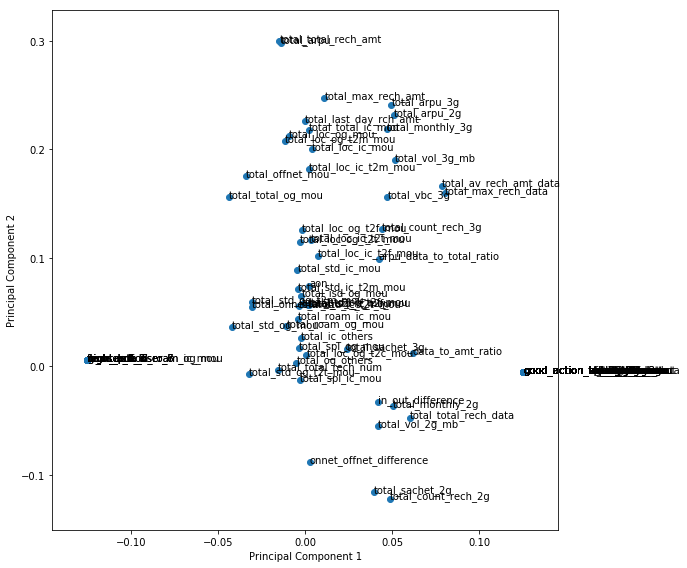

In [147]:
pca.fit(X_train)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

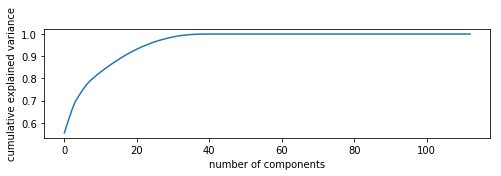

In [148]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the graph it is clear that around 30 components convey more than 95% of variance data

In [149]:
#Import incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [150]:
#Fit the train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(14667, 30)

In [151]:
#Fit the validation data
df_val_pca = pca_final.fit_transform(X_val)
df_val_pca.shape

(6287, 30)

In [152]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

In [153]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [154]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score

In [155]:
# Let's check the report of our default model on training data
print(classification_report(y_train,rfc.predict(X_train)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     13487
          1       1.00      0.84      0.92      1180

avg / total       0.99      0.99      0.99     14667



In [156]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc.predict(X_train)))

[[13486     1]
 [  183   997]]


In [157]:
# Let's check the report of our default model on validation data
print(classification_report(y_val,rfc.predict(X_val)))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96      5768
          1       0.53      0.10      0.17       519

avg / total       0.89      0.92      0.89      6287



In [158]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(X_val)))

[[5722   46]
 [ 468   51]]


F1 score for training data is almost 1 wheareas for validation data it is much less. It is clearly overfitting. We will use GridSearch on each parameter to check the optimal range. Since it is classification we use auc_score for our scoring metric

In [159]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5
scoring = {'AUC': 'roc_auc'}
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',verbose=1)
grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   33.2s finished


In [162]:
#Add the results to dataframe
pd.DataFrame(train_results).head(10)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.171268         0.007621         0.779852          0.793220   
1       0.204063         0.006515         0.802720          0.817998   
2       0.224018         0.008022         0.808964          0.838998   
3       0.234544         0.008151         0.823378          0.862987   
4       0.311702         0.006919         0.824336          0.889521   
5       0.352639         0.008022         0.820993          0.913529   
6       0.375447         0.009126         0.819200          0.937217   
7       0.429473         0.009325         0.818685          0.956157   
8       0.490836         0.010731         0.815466          0.966341   
9       0.353908         0.006324         0.805191          0.977268   

  param_max_depth             params  rank_test_score  split0_test_score  \
0               2   {'max_depth': 2}               17           0.794430   
1               3   {'max_depth': 3}                9           0.805851   
2               4   {'max_depth': 4}                7           0.807178   
3               5   {'max_depth': 5}                2           0.831377   
4               6   {'max_depth': 6}                1           0.831770   
5               7   {'max_depth': 7}                3           0.819595   
6               8   {'max_depth': 8}                4           0.826998   
7               9   {'max_depth': 9}                5           0.832599   
8              10  {'max_depth': 10}                6           0.826855   
9              11  {'max_depth': 11}                8           0.809280   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.800701           0.784396            0.794238   
1            0.811085           0.807046            0.816254   
2            0.825196           0.795377            0.832655   
3            0.860315           0.825859            0.865469   
4            0.885792           0.820804            0.891362   
5            0.912505           0.820960            0.913582   
6            0.937466           0.817476            0.936549   
7            0.956646           0.812888            0.954114   
8            0.968246           0.812947            0.965149   
9            0.978390           0.788661            0.974050   

   split2_test_score  split2_train_score  split3_test_score  \
0           0.779608            0.792967           0.768179   
1           0.801169            0.818664           0.797667   
2           0.821028            0.846807           0.808864   
3           0.823145            0.861776           0.814940   
4           0.833192            0.887920           0.808796   
5           0.818174            0.911302           0.823168   
6           0.816357            0.938909           0.822149   
7           0.815546            0.954282           0.820407   
8           0.823326            0.967613           0.797219   
9           0.820965            0.978419           0.802624   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.784162           0.772638            0.794032      0.009013   
1            0.815801           0.801865            0.828185      0.010656   
2            0.848809           0.812378            0.841522      0.009676   
3            0.861017           0.821565            0.866356      0.039532   
4            0.891993           0.827118            0.890540      0.019835   
5            0.915013           0.823068            0.915243      0.011452   
6            0.938567           0.813020            0.934594      0.014682   
7            0.958330           0.811983            0.957413      0.027931   
8            0.965085           0.816983            0.965612      0.086958   
9            0.976828           0.804430            0.978651      0.049834   

   std_score_time  std_test_score  std_train_score  
0        0.001860        0.009182         0.005287  
1        

In [163]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(2, 20, 1):
    rf = RandomForestClassifier(max_depth=feature,class_weight='balanced_subsample')
    rf.fit(X_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(X_val))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

Text(0,0.5,'AUC Score')

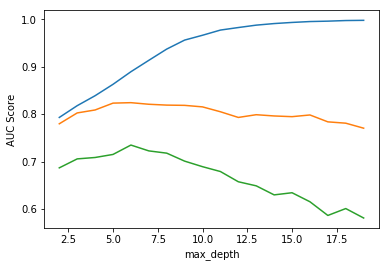

In [164]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(train_results["param_max_depth"], 
         train_results["mean_train_score"], 
         label="train auc score")
plt.plot(train_results["param_max_depth"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")

In [165]:
#Fit the range of features
parameters = {'n_estimators': range(200, 1800, 200)}

# instantiate the model ()
rf = RandomForestClassifier(class_weight='balanced_subsample', max_depth=6)

# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  7.5min remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.9min finished


In [166]:
pd.DataFrame(train_results).head(20)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       7.900613         0.127740         0.834257          0.901042   
1      17.967389         0.259591         0.834546          0.901617   
2      27.058370         0.406281         0.835353          0.901799   
3      39.939758         0.525096         0.834384          0.901879   
4      48.413092         0.642609         0.834956          0.901650   
5      60.817373         0.863401         0.834917          0.901930   
6      67.120132         0.902300         0.835212          0.901973   
7      72.221803         0.882972         0.835406          0.901825   

  param_n_estimators                  params  rank_test_score  \
0                200   {'n_estimators': 200}                8   
1                400   {'n_estimators': 400}                6   
2                600   {'n_estimators': 600}                2   
3                800   {'n_estimators': 800}                7   
4               1000  {'n_estimators': 1000}                4   
5               1200  {'n_estimators': 1200}                5   
6               1400  {'n_estimators': 1400}                3   
7               1600  {'n_estimators': 1600}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.843850            0.900819           0.831732   
1           0.843176            0.901221           0.832269   
2           0.844017            0.900833           0.834246   
3           0.842884            0.900765           0.831755   
4           0.844172            0.901559           0.831565   
5           0.843712            0.901191           0.832834   
6           0.843539            0.901464           0.832423   
7           0.843737            0.901273           0.832267   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.900716           0.836710            0.900547   
1            0.900764           0.837337            0.901554   
2            0.901621           0.838683            0.901825   
3            0.901450           0.838494            0.901854   
4            0.900596           0.838509            0.901365   
5            0.901520           0.838273            0.901596   
6            0.900916           0.838505            0.901941   
7            0.900731           0.838609            0.902057   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.826995            0.901823           0.831995   
1           0.827490            0.902711           0.832455   
2           0.827676            0.902540           0.832142   
3           0.827668            0.903060           0.831115   
4           0.827786            0.902408           0.832746   
5           0.826724            0.902829           0.833038   
6           0.828273            0.902891           0.833319   
7           0.828483            0.902578           0.833930   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.901304      0.661584        0.015772        0.005697   
1            0.901834      0.310032        0.025693        0.005322   
2            0.902175      0.200897        0.043411        0.005597   
3            0.902267      1.117022        0.023145        0.005511   
4            0.902321      1.008143        0.044123        0.005751   
5            0.902513      2.138625        0.147414        0.005720   
6            0.902655      1.152085        0.013125        0.005286   
7            0.902485      8.734258        0.212628        0.005284   

   std_train_score  
0         0.000465  
1         0.000653  
2         0.000576  
3         0.000771  
4         0.000667  
5         0.000628  
6         0.000733  
7         0.000715

In [167]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(200, 1800, 200):
    rf = RandomForestClassifier(n_estimators=feature, class_weight='balanced_subsample', max_depth=6)
    rf.fit(X_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(X_val))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

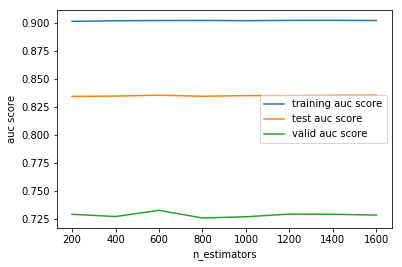

In [168]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("n_estimators")
plt.ylabel("auc score")
plt.legend()
plt.show()

In [180]:
# parameters to build the model on max_features
parameters = {'max_features': range(2, 30, 2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   24.1s finished


In [181]:
pd.DataFrame(train_results).head(10)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.303960         0.020254         0.745529          0.999835   
1       0.451701         0.017948         0.743365          0.999548   
2       0.631179         0.013735         0.754584          0.999848   
3       0.716104         0.011932         0.750385          0.999808   
4       0.788697         0.013636         0.752949          0.999806   
5       0.867407         0.011330         0.770474          0.999774   
6       0.958550         0.011932         0.762160          0.999783   
7       0.981009         0.011130         0.763614          0.999769   
8       1.044979         0.011531         0.764441          0.999822   
9       1.097218         0.010829         0.760956          0.999758   

  param_max_features                params  rank_test_score  \
0                  2   {'max_features': 2}               13   
1                  4   {'max_features': 4}               14   
2                  6   {'max_features': 6}               10   
3                  8   {'max_features': 8}               12   
4                 10  {'max_features': 10}               11   
5                 12  {'max_features': 12}                1   
6                 14  {'max_features': 14}                6   
7                 16  {'max_features': 16}                4   
8                 18  {'max_features': 18}                2   
9                 20  {'max_features': 20}                7   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.772430            0.999823           0.735353   
1           0.749295            0.999770           0.742237   
2           0.779964            0.999833           0.727037   
3           0.753064            0.999777           0.746839   
4           0.768465            0.999711           0.762200   
5           0.774550            0.999684           0.773026   
6           0.776191            0.999610           0.759036   
7           0.772832            0.999664           0.763118   
8           0.783164            0.999822           0.741105   
9           0.759588            0.999749           0.747845   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.999847           0.738452            0.999812   
1            0.999752           0.762801            0.999854   
2            0.999786           0.744054            0.999933   
3            0.999839           0.760204            0.999799   
4            0.999801           0.734954            0.999851   
5            0.999861           0.774677            0.999754   
6            0.999779           0.751967            0.999852   
7            0.999807           0.760918            0.999807   
8            0.999821           0.786381            0.999822   
9            0.999777           0.760993            0.999828   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.731690            0.999851           0.749714   
1           0.715235            0.999766           0.747257   
2           0.754869            0.999740           0.766995   
3           0.732365            0.999874           0.759453   
4           0.750817            0.999804           0.748299   
5           0.758131            0.999746           0.771985   
6           0.751033            0.999832           0.772568   
7           0.756764            0.999790           0.764435   
8           0.749628            0.999844           0.761929   
9           0.778930            0.999633           0.757431   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.999842      0.078867        0.010257        0.014741   
1            0.998599      0.026382        0.004937        0.015623   
2            0.999950      0.032769        0.001697        0.018266   
3            0.999753      0.036052        0.000919        0.010228   
4            0.999863      0.090548        0.003770        0.011630 

In [182]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(2, 30, 2):
    rf = RandomForestClassifier(max_features=feature,class_weight='balanced_subsample')
    rf.fit(X_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(X_val))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

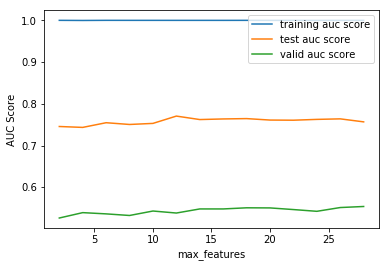

In [183]:
# plotting accuracies with param_max_features
plt.figure()
plt.plot(train_results["param_max_features"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_max_features"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [184]:
# parameters to build the model on min_samples_leaf
parameters = {'min_samples_leaf': range(10, 400, 10)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

In [186]:
pd.DataFrame(train_results).head(15)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.609231         0.012934         0.817217          0.973338   
1        0.735842         0.019951         0.826352          0.949374   
2        0.675100         0.009823         0.827642          0.931339   
3        0.660857         0.016244         0.821166          0.918088   
4        0.635891         0.009829         0.824828          0.907655   
5        0.654941         0.023863         0.827283          0.901742   
6        0.655744         0.019051         0.827703          0.893867   
7        0.646519         0.011230         0.826529          0.886366   
8        0.586560         0.014739         0.827120          0.881497   
9        0.467644         0.009726         0.825062          0.878264   
10       0.392845         0.010929         0.825475          0.875244   
11       0.393647         0.008924         0.827841          0.869983   
12       0.382718         0.008623         0.825336          0.869543   
13       0.392042         0.008824         0.826597          0.866826   
14       0.385625         0.009826         0.821275          0.861814   

   param_min_samples_leaf                     params  rank_test_score  \
0                      10   {'min_samples_leaf': 10}               19   
1                      20   {'min_samples_leaf': 20}                8   
2                      30   {'min_samples_leaf': 30}                3   
3                      40   {'min_samples_leaf': 40}               14   
4                      50   {'min_samples_leaf': 50}               12   
5                      60   {'min_samples_leaf': 60}                4   
6                      70   {'min_samples_leaf': 70}                2   
7                      80   {'min_samples_leaf': 80}                7   
8                      90   {'min_samples_leaf': 90}                5   
9                     100  {'min_samples_leaf': 100}               11   
10                    110  {'min_samples_leaf': 110}                9   
11                    120  {'min_samples_leaf': 120}                1   
12                    130  {'min_samples_leaf': 130}               10   
13                    140  {'min_samples_leaf': 140}                6   
14                    150  {'min_samples_leaf': 150}               13   

    split0_test_score  split0_train_score  split1_test_score  \
0            0.818324            0.972484           0.827038   
1            0.824962            0.948226           0.825542   
2            0.833906            0.929629           0.832788   
3            0.835950            0.917287           0.821029   
4            0.841017            0.905041           0.814848   
5            0.838727            0.898882           0.835531   
6            0.836007            0.896053           0.822217   
7            0.836290            0.887689           0.817715   
8            0.838756            0.883095           0.829965   
9            0.830512            0.878881           0.825381   
10           0.832234            0.871004           0.834432   
11           0.831519            0.867163           0.835356   
12           0.839192            0.871848           0.820387   
13           0.837017            0.860690           0.825592   
14           0.833181            0.865657           0.828184   

    split1_train_score  split2_test_score  split2_train_score  \
0             0.971337           0.817637            0.975760   
1             0.949153           0.831941            0.949936   
2             0.930966           0.838029            0.935819   
3             0.915253           0.820066            0.918173   
4             0.903817           0.825499            0.909963   
5             0.905699           0.827616            0.896842   
6             0.890312           0.833526            0.893959   
7             0.881005           0.832067            0.885031   
8             0.881214           0.832717            0.8

In [188]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(10, 400, 10):
    rf = RandomForestClassifier(min_samples_leaf=feature, class_weight='balanced_subsample')
    rf.fit(X_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(X_val))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

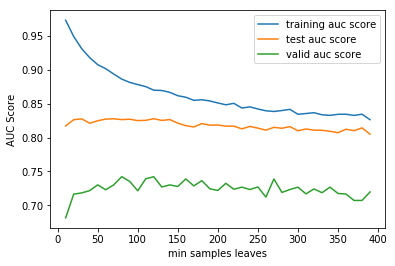

In [189]:
# plotting accuracies with param_min_samples_leaf
plt.figure()
plt.plot(train_results["param_min_samples_leaf"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_min_samples_leaf"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("min samples leaves")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [190]:
# parameters to build the model on min_samples_split
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

In [191]:
pd.DataFrame(train_results).head(10)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.377777         0.006518         0.825052          0.906650   
1       0.427637         0.008423         0.826188          0.898664   
2       0.458620         0.013235         0.824586          0.889811   
3       0.521186         0.011431         0.824287          0.883976   
4       0.503339         0.008422         0.827503          0.877854   
5       0.452603         0.007620         0.824617          0.874715   

  param_min_samples_split                      params  rank_test_score  \
0                     200  {'min_samples_split': 200}                3   
1                     250  {'min_samples_split': 250}                2   
2                     300  {'min_samples_split': 300}                5   
3                     350  {'min_samples_split': 350}                6   
4                     400  {'min_samples_split': 400}                1   
5                     450  {'min_samples_split': 450}                4   

   split0_test_score  split0_train_score  split1_test_score  \
0           0.835547            0.905609           0.825948   
1           0.833840            0.889285           0.832793   
2           0.831971            0.890473           0.819515   
3           0.829126            0.881835           0.825442   
4           0.834732            0.875254           0.823639   
5           0.827317            0.870592           0.827798   

   split1_train_score  split2_test_score  split2_train_score  \
0            0.906596           0.819410            0.906505   
1            0.900570           0.823880            0.899398   
2            0.890359           0.829020            0.887595   
3            0.882887           0.827791            0.884770   
4            0.878984           0.832728            0.873331   
5            0.875255           0.829763            0.872472   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.819751            0.908345           0.824600   
1           0.815031            0.902891           0.825388   
2           0.820900            0.887305           0.821525   
3           0.820127            0.888209           0.818947   
4           0.826332            0.883256           0.820080   
5           0.813606            0.879145           0.824602   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.906194      0.066931        0.003371        0.005850   
1            0.901174      0.014080        0.000375        0.006821   
2            0.893323      0.049641        0.007987        0.004958   
3            0.882178      0.026097        0.004544        0.004071   
4            0.878446      0.049021        0.000736        0.005495   
5            0.876110      0.089440        0.000375        0.005747   

   std_train_score  
0         0.000915  
1         0.004823  
2         0.002203  
3         0.002348  
4         0.003407  
5         0.002963

In [192]:
#Fit the range of feature on validation data to plot
auc_list = []
feature_list=[]
for feature in range(200, 500, 50):
    rf = RandomForestClassifier(min_samples_split=feature,class_weight='balanced_subsample')
    rf.fit(X_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_val, rf.predict(X_val))
    auc_list.append(auc(fpr, tpr))
    feature_list.append(feature)

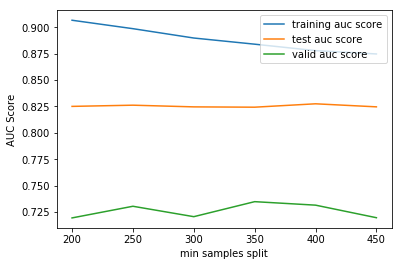

In [193]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(train_results["param_min_samples_split"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_min_samples_split"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.plot(feature_list, 
         auc_list, 
         label="valid auc score")
plt.xlabel("min samples split")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,6,7],
    'min_samples_leaf': range(300, 400, 10),
    'min_samples_split': range(350, 450, 10),
    'n_estimators': [500], 
    'max_features': range(2, 30, 2),
    "bootstrap": [True],    
}
scoring = {'AUC': 'roc_auc'}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced_subsample')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring='roc_auc',  verbose=10)
grid_search.fit(X_train, y_train)
train_results = grid_search.cv_results_

Fitting 3 folds for each of 4200 candidates, totalling 12600 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.9s


In [ ]:
pd.DataFrame(train_results).head(10)

In [ ]:
# printing the optimal auc score and hyperparameters
print('We can get auc score of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=300, 
                             min_samples_split=410,
                             max_features=45,
                             n_estimators=500)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# Let's check the report of our optimal model on training data
print(classification_report(y_train,rfc.predict(X_train)))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc.predict(X_train)))

In [ ]:
# Let's check the report of our optimal model on validation data
print(classification_report(y_val,rfc.predict(X_val)))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_val,rfc.predict(X_val)))

In [ ]:
# Let's check the report of our default model on validation data
print(classification_report(y_test,rfc.predict(X_test)))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,rfc.predict(X_test)))

In [ ]:
#import Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9]
             }

In [ ]:
# adaboost with the optimal tree as base estimator
ABC = AdaBoostClassifier(
    base_estimator=rfc,
    algorithm="SAMME")
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 10, n_jobs=-1)
# fit 
grid_search_ABC.fit(X_train, y_train)

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_train,grid_search_ABC.predict(X_train)))

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_val,grid_search_ABC.predict(X_val)))

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_test,grid_search_ABC.predict(X_test)))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,grid_search_ABC.predict(X_test)))